# **Project Name**    -  - Yulu Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a **regression supervised machine learning model** to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After **preprocessing** and **cleaning** **the** **data**, I split it into **training** **and** **test** **sets** and used the training data to train our machine learning model. I experimented with several different**model architectures and hyperparameter** settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including **mean absolute error, root mean squared error, and R-squared**. I found that our model was able to make highly accurate predictions, with an **R-squared value of 0.88 and a mean absolute error of just 2.58**.

In addition to evaluating the performance of our model on the test data, I also conducted a series of **ablation studies** to understand the impact of individual features on the model's performance. **I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.**

# **Problem Statement**


In the evolving landscape of urban mobility, companies like Yulu Bike are at the forefront of providing efficient and eco-friendly transportation solutions. Accurate prediction of bike-sharing demand is crucial for optimizing fleet management, enhancing customer satisfaction, and maximizing operational efficiency. By analyzing data related to bike-sharing demand, Yulu Bike aims to gain a deeper understanding of the factors influencing bike rentals. The dataset includes a range of variables such as weather conditions, time of day, and special events, which impact bike usage patterns.

Leveraging this data, Yulu Bike can:

1. Optimize Fleet Management:

Predicting demand based on factors like temperature, humidity, and time of day allows Yulu Bike to deploy bikes more strategically, ensuring availability during peak times and reducing idle resources.

2. Enhance Customer Experience:

By understanding how external factors such as weather and holidays affect demand, Yulu Bike can better align their service offerings with customer needs, improving overall user satisfaction.

3. Improve Operational Efficiency:

Accurate demand forecasts help in planning maintenance schedules and managing bike distribution across different areas, leading to more efficient operations.

4. Adapt to Environmental Factors:

Insights into how weather conditions and seasonal variations impact bike usage enable Yulu Bike to adjust their strategies in real-time, ensuring optimal service delivery throughout the year.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import datetime as dt  # Import datetime for working with dates and times

import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
from scipy import stats  # Import SciPy for statistical functions
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for converting categorical labels to numbers
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling

# Importing Pandas again (unnecessary, already imported above)
import pandas as pd

from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and test sets

from sklearn.linear_model import LinearRegression  # Import LinearRegression for building linear regression models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import metrics for evaluating model performance

from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning with grid search
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor for building random forest regression models
from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation scoring

# Importing LinearRegression again (unnecessary, already imported above)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV again (unnecessary, already imported above)
from sklearn.preprocessing import StandardScaler  # Import StandardScaler again (unnecessary, already imported above)
from sklearn.pipeline import Pipeline  # Import Pipeline for creating a machine learning pipeline

from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor again (unnecessary, already imported above)

from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV for hyperparameter tuning with randomized search
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor again (unnecessary, already imported above)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import metrics again (unnecessary, already imported above)

import numpy as np  # Import NumPy again (unnecessary, already imported above)
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Importing modules for data splitting and random search for hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor for building gradient boosting regression models
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor for building decision tree regression models

# Importing warnings library. The warnings module handles warnings in Python.
import warnings  # Import warnings to manage warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages during execution


In [ ]:
#mounting the drive to load dataset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset

bike_df = pd.read_csv('/content/drive/MyDrive/M6_ALMABETTER_PROJECT/SeoulBikeData.csv' , encoding='latin-1')

### Dataset First View

In [ ]:
# Dataset First Look


bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
#viewing the last 5 data of the datase

bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

data_set_shape = bike_df.shape

print(f'The Bike Rental Dataset Has {data_set_shape[0]} Rows and It has {data_set_shape[1]} Columns')

The Bike Rental Dataset Has 8760 Rows and It has 14 Columns


In [ ]:
#extracting all the column name of the dataset
print(bike_df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f'The No. Of Duplicate Value in Bike Rental Dataset is {bike_df.duplicated().sum()}')

The No. Of Duplicate Value in Bike Rental Dataset is 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

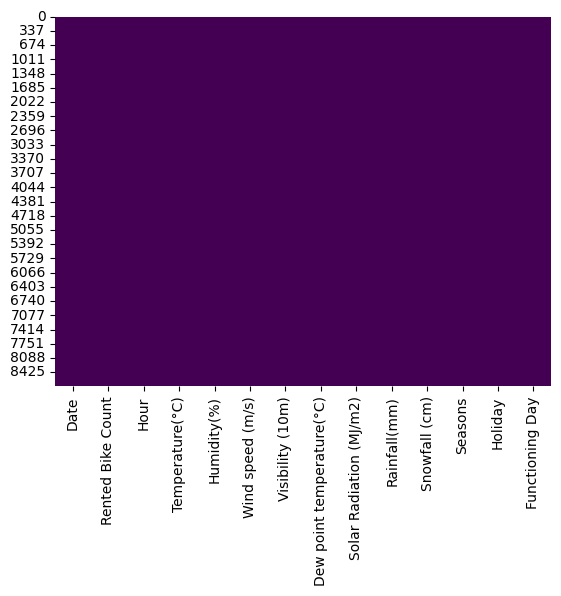

In [ ]:
# Visualizing the missing values

sns.heatmap(bike_df.isnull() , cbar = False, cmap= 'viridis')

plt.show()

### What did you know about your dataset?

### 1. **Overview of the Dataset:**
   - The dataset consists of **8760 rows** and **14 columns**.
   - It provides data on bike rentals with information such as weather conditions, date, time, and operational status.
   - There are **no missing or duplicate values**.

### 2. **Data Types and Column Categorization:**

#### a. **Date/Time:**
   - **Date**: Currently stored as an object (string) – 365 unique values. This needs to be converted into **datetime format** for accurate time-based analysis.
   - **Hour**: Integer – 24 unique values.

#### b. **Numerical Columns (Continuous):**
   - **Rented Bike Count**: Integer – 2166 unique values.
   - **Temperature (°C)**: Float – 546 unique values.
   - **Humidity (%)**: Integer – 90 unique values.
   - **Wind Speed (m/s)**: Float – 65 unique values.
   - **Visibility (10m)**: Integer – 1789 unique values.
   - **Dew Point Temperature (°C)**: Float – 556 unique values.
   - **Solar Radiation (MJ/m²)**: Float – 345 unique values.
   - **Rainfall (mm)**: Float – 61 unique values.
   - **Snowfall (cm)**: Float – 51 unique values.

#### c. **Categorical Columns:**
   - **Seasons**: Object (string) – 4 unique values (Winter, Spring, Summer, Fall).
   - **Holiday**: Object (string) – 2 unique values (Yes, No).
   - **Functioning Day**: Object (string) – 2 unique values (Yes, No).

### 3. **Additional Insights:**
   - The **Date** column needs to be converted from string to **datetime** format for better time-series analysis.
   - The dataset is clean and ready for analysis, making it suitable for time-series forecasting, weather-based analysis, or predictive modeling of bike rentals based on external factors like weather and holidays.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features: {bike_df.columns.tolist()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
# Dataset Describe

bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

**Features** **description**

**Breakdown** **of** **Our** **Features**:

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented** **Bike** **Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature**(**°C**): Temperature in Celsius, type : Float

**Humidity**(%): Humidity in the air in %, type : int

**Wind** **speed** (**m**/s) : Speed of the wind in m/s, type : Float

**Visibility** (**10m**): Visibility in m, type : int

**Dew point temperature(°C**): Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2**): Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data .

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in bike_df.columns.tolist():
  print(f'The No. of Unique Value in {i} is : {bike_df[i].nunique()}')

The No. of Unique Value in Date is : 365
The No. of Unique Value in Rented Bike Count is : 2166
The No. of Unique Value in Hour is : 24
The No. of Unique Value in Temperature(°C) is : 546
The No. of Unique Value in Humidity(%) is : 90
The No. of Unique Value in Wind speed (m/s) is : 65
The No. of Unique Value in Visibility (10m) is : 1789
The No. of Unique Value in Dew point temperature(°C) is : 556
The No. of Unique Value in Solar Radiation (MJ/m2) is : 345
The No. of Unique Value in Rainfall(mm) is : 61
The No. of Unique Value in Snowfall (cm) is : 51
The No. of Unique Value in Seasons is : 4
The No. of Unique Value in Holiday is : 2
The No. of Unique Value in Functioning Day is : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

## **Changing column name**

Renaming the columns is useful because the existing names contain annotations like units (e.g., `°C`, `mm`) and spaces, which can make coding cumbersome. Simplifying the names by removing special characters and spaces improves readability and ensures compatibility with programming languages and libraries that require cleaner, more consistent naming conventions. This makes the dataset easier to work with and reduces potential errors during analysis.

In [ ]:
# Write your code to make your dataset analysis ready.
bike_df = bike_df.rename(columns = {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

# **Breaking date column**

In [ ]:
# replacing '-' to '/' then it will be easy to convert data type of date column into the date time format

bike_df['Date'] = bike_df['Date'].str.replace('-', '/')

bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')  #converting date column in the date format

In [ ]:
# Now, split date into separate year, month, and day columns

bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month_name()
bike_df['day'] = bike_df['Date'].dt.day_name()

In [ ]:
#creating a new column of "weekdays_weekend"

bike_df['weekday_or_weekend'] = bike_df['day'].apply(lambda x : 'Weekend' if x == 'Saturday' or x =='Sunday' else 'Weekday')


In [ ]:
#printing first 5 data to check all operation we have done till now is sucessfull or not

bike_df.drop('Date', axis=1, inplace=True)

bike_df.head(10)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   
5                100     5         -6.4        37         1.5        2000   
6                181     6         -6.6        35         1.3        2000   
7                460     7         -7.4        38         0.9        2000   
8                930     8         -7.6        37         1.1        2000   
9                490     9         -6.5        27         0.5        1928   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6             0.00       0.0       0.0  Winter   
1                  -17.6             0.00       0.0       0.0  Winter   
2                  -17.7             0.00       0.0       0.0  Winter   
3                  -17.6             0.00       0.0       0.0  Winter   
4                  -18.6             0.00       0.0       0.0  Winter   
5                  -18.7             0.00       0.0       0.0  Winter   
6                  -19.5             0.00       0.0       0.0  Winter   
7                  -19.3             0.00       0.0       0.0  Winter   
8                  -19.8             0.01       0.0       0.0  Winter   
9                  -22.4             0.23       0.0       0.0  Winter   

      Holiday Functioning_Day  year     month     day weekday_or_weekend  
0  No Holiday             Yes  2017  December  Friday            Weekday  
1  No Holiday             Yes  2017  December  Friday            Weekday  
2  No Holiday             Yes  2017  December  Friday            Weekday  
3  No Holiday             Yes  2017  December  Friday            Weekday  
4  No Holiday             Yes  2017  December  Friday            Weekday  
5  No Holiday             Yes  2017  December  Friday            Weekday  
6  No Holiday             Yes  2017  December  Friday            Weekday  
7  No Holiday             Yes  2017  December  Friday            Weekday  
8  No Holiday             Yes  2017  December  Friday            Weekday  
9  No Holiday             Yes  2017  December  Friday            Weekday

In [ ]:
# Display information about the DataFrame, including the number of entries, column names, non-null counts, and data types

bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  year                   8760 non-null   int32  
 14  month                  8760 non-null   object 
 15  day 

### What all manipulations have you done and insights you found?

### Data Manipulations:
1. **Renaming Columns**:
   - Standardized column names by replacing spaces with underscores and simplifying names (e.g., `'Rented Bike Count'` became `'Rented_Bike_Count'`, `'Temperature(°C)'` became `'Temperature'`, etc.).
   
2. **Date Formatting**:
   - Replaced the hyphen `'-'` with a slash `'/'` in the `'Date'` column to standardize the date format.
   - Converted the `'Date'` column into a datetime format using the format `'%d/%m/%Y'`.

3. **Date Splitting**:
   - Created new columns for `'year'`, `'month'`, and `'day'` from the `'Date'` column for easier time-based analysis.
   
4. **Weekday vs. Weekend**:
   - Created a new column `'weekday_or_weekend'` that categorizes each entry as either `'Weekend'` (Saturday or Sunday) or `'Weekday'` based on the day of the week.

### Insights so far:
- **Data Consistency**:
   - After standardizing and cleaning the dataset, the date column is now properly formatted, which helps in performing time-based aggregations or analysis.
   
- **Feature Enrichment**:
   - The new `'weekday_or_weekend'` column allows for quick comparison of bike rentals between weekdays and weekends.
   - The split of `'Date'` into `'year'`, `'month'`, and `'day'` opens opportunities to explore seasonal trends, daily variations, or yearly growth in bike rentals.

With these manipulations, you can now explore various insights, such as:
- **Trends in bike rentals** over months or seasons.
- **Impact of weekends** on bike rentals.
- **Correlation between weather conditions (e.g., temperature, snowfall, rainfall)** and bike rentals.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

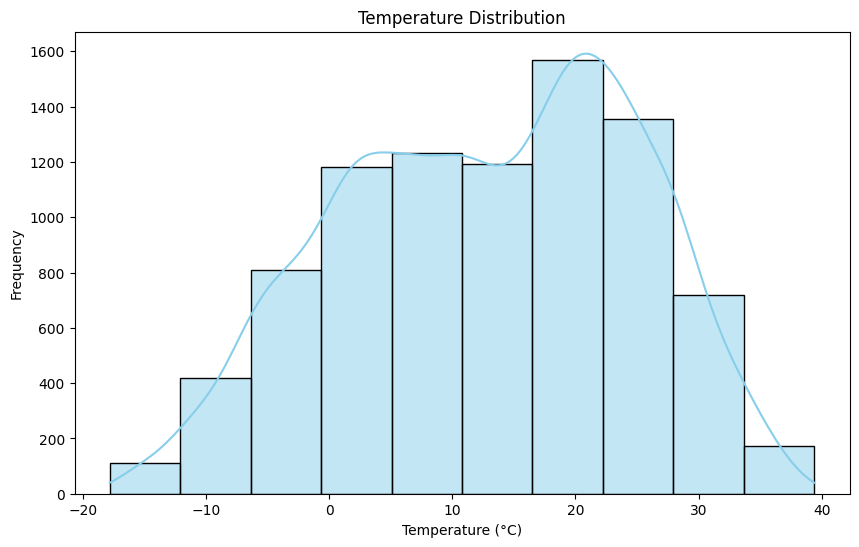

In [ ]:
# Chart - 1 visualization code

# Plotting a histogram for analyzing the distribution of temperature values

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Temperature' column with a kernel density estimate (KDE)
sns.histplot(bike_df['Temperature'], kde=True, bins=10, color='skyblue')

# Set the title of the plot
plt.title('Temperature Distribution')

# Label the x-axis
plt.xlabel('Temperature (°C)')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()



##### 1. Why did you pick the specific chart?

I chose a **histogram with a KDE curve** because it is one of the best tools for conducting **univariate analysis** (analyzing a single variable) when the goal is to understand the **distribution** of continuous numerical data, like temperature.

### Reasons for choosing this chart:

1. **Visualizing Frequency Distribution**:
   - The **histogram** clearly shows how frequently different temperature values occur, which helps identify common temperature ranges and the overall shape of the distribution.

2. **Distribution Shape and Skewness**:
   - A histogram reveals the **shape of the distribution**, whether it is normal, skewed, or has multiple peaks. In this case, it helps to see the **slightly negatively skewed** nature of the temperature data.
   - The **KDE curve** smoothens out the data to give a better understanding of the underlying density of the data points, complementing the histogram.

3. **Outliers and Spread**:
   - The histogram, combined with the KDE curve, allows for quick identification of **outliers** (if any) and provides insights into the **spread** of the temperature data, such as the range and where most data points are concentrated.

4. **Summary of Central Tendency**:
   - It also helps to identify the **central tendency** of the data (e.g., where most of the temperature values fall). In this chart, we see that most temperatures lie between **10-20°C**, which is crucial for summarizing the typical behavior of temperature in the dataset.

5. **Frequency and Distribution in One View**:
   - This chart efficiently combines the frequency of temperature values (from the histogram) and a smooth estimation of the probability distribution (from the KDE), giving a more comprehensive view of the data in a single chart.



##### 2. What is/are the insight(s) found from the chart?

From the chart, several key insights about the **Temperature** data can be gathered:

### 1. **Temperature Distribution**:
   - The data shows a **roughly normal distribution**, with most temperature values concentrated between **0°C and 25°C**.
   - The distribution is slightly **negatively skewed**, meaning colder temperatures (below the mean) occur slightly more frequently than very warm temperatures.

### 2. **Most Frequent Temperature Range**:
   - The **peak of the distribution** occurs around **10°C to 20°C**, indicating this is the most common temperature range in the dataset. This could imply that the majority of days or hours in the dataset experience moderate temperatures.

### 3. **Extremes Are Less Common**:
   - **Extreme temperatures**, both **very cold** (below -10°C) and **very hot** (above 30°C), are relatively rare in the dataset, as seen from the lower bars in these regions.
   - This suggests that the dataset primarily contains mild to moderate temperature values, with fewer extreme weather conditions.

### 4. **Spread of Temperature**:
   - The temperature values cover a wide range, from **around -15°C to 35°C**, showing that the data includes both cold and hot periods.
   - However, the majority of the data is concentrated between **0°C and 25°C**, with temperatures below 0°C and above 25°C occurring less frequently.

### 5. **Outliers**:
   - There are no extreme outliers visible in the histogram, suggesting that the temperature values are relatively consistent, without major deviations from the normal range.

### 6. **Skewness Insight**:
   - The **slight left skew** (negative skewness) indicates that colder temperatures are slightly more frequent than very high temperatures. This can be important depending on the context, such as in seasonal or location-based temperature analysis.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact Insights:**

The insights gained from the temperature distribution can be leveraged to create positive business outcomes, particularly for businesses where **temperature plays a role in customer behavior**, product demand, or service delivery. Here’s how:

1. **Optimal Temperature for Business Operations**:
   - The most common temperature range, between **10°C and 20°C**, is moderate and generally comfortable for outdoor activities. If the business involves outdoor services (e.g., bike rentals, outdoor events, tourism), knowing that this range is frequent allows the business to **plan promotions** and **optimize staffing levels** for these temperature conditions.

2. **Seasonal Demand Forecasting**:
   - If the data represents a specific season or location, knowing that extreme temperatures (below -10°C or above 30°C) are rare means that the business can focus more on planning for mild to warm weather. For example:
     - **Bike rental services** may see higher demand in **moderate temperatures** (10°C to 20°C) and can increase inventory or staffing accordingly.
     - **Retail businesses** can **stock temperature-sensitive products** (like seasonal clothing) in line with the common temperature ranges, optimizing inventory and sales.

3. **Energy Management**:
   - Businesses involved in **energy services**, such as heating or cooling, can anticipate that energy demand will likely peak when temperatures move towards the extremes (cold or hot). However, since extreme temperatures are rare, businesses can focus on efficiency measures during **moderate temperature periods** to reduce operational costs.

4. **Customer Comfort and Experience**:
   - Businesses that provide **customer experiences (e.g., restaurants with outdoor seating, theme parks)** can optimize operations during the most common temperature ranges, ensuring that they provide the best services during periods of moderate temperatures when customers are more likely to engage in outdoor activities.

### **Negative Growth Insights and Justifications:**

1. **Limited Business During Extreme Conditions**:
   - The histogram shows that temperatures below **-10°C and above 30°C** are infrequent. For businesses that heavily rely on **extreme weather conditions** (such as ski resorts or cold-weather clothing), this distribution may indicate **limited opportunities** to capitalize on extreme cold weather.
     - **Negative Impact**: If a business model is built around extreme conditions, this can lead to **lower revenue growth** or **idle periods** when extreme weather is less frequent.

2. **Over-reliance on Rare Events**:
   - If a business mistakenly expects extreme temperatures to occur more frequently, it may **over-invest** in resources or products designed for these rare conditions (e.g., excessive winter gear or cooling systems for high temperatures). This can lead to **excess inventory** or **unused resources**, resulting in **financial losses**.
     - **Negative Impact**: Poor inventory management based on incorrect assumptions about temperature distribution can lead to **inefficiencies**, waste, or **reduced profitability**.

3. **Not Preparing for Extreme Events**:
   - Although extreme temperatures are rare, businesses that **fail to prepare for occasional extreme events** (such as sudden heat waves or cold snaps) could experience **operational challenges**. For instance:
     - **Negative Impact**: A lack of contingency plans for extreme cold or heat (e.g., insufficient heating/cooling systems) can negatively impact customer satisfaction and lead to **business disruption** during these rare events.



#### Chart - 2

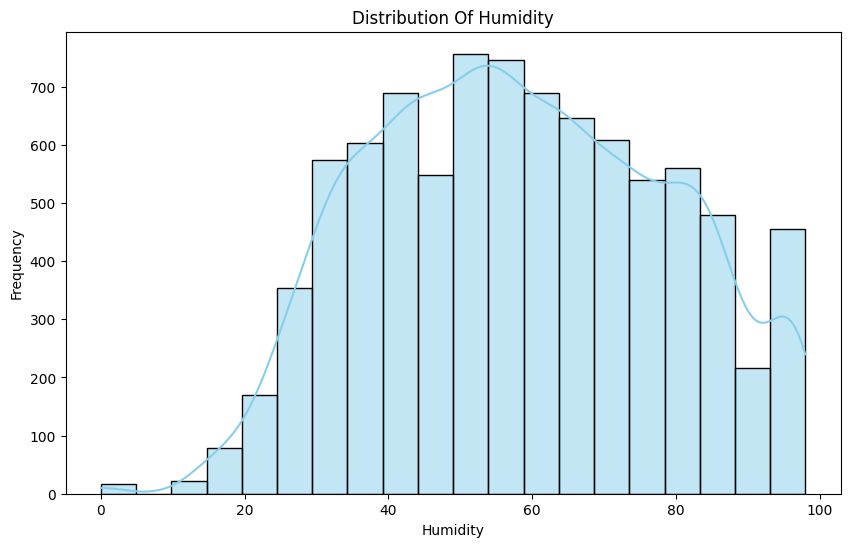

In [ ]:
# Chart - 2 visualization code

# Visualizing the distribution of Humidity in the dataset

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'Humidity' column with a kernel density estimate (KDE)

sns.histplot(x=bike_df['Humidity'], kde=True, bins=20, color='skyblue')

# Set the title of the plot
plt.title('Distribution Of Humidity')

# Label the x-axis
plt.xlabel('Humidity')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()




##### 1. Why did you pick the specific chart?

I chose a **histogram with a KDE curve** because it is one of the best tools for conducting **univariate analysis** (analyzing a single variable) when the goal is to understand the **distribution** of continuous numerical data, like humidity.

### Reasons for choosing this chart:

1. **Visualizing Frequency Distribution**:
   - The **histogram** clearly shows how frequently different humidity values occur, which helps identify common humidity ranges and the overall shape of the distribution.

2. **Distribution Shape and Skewness**:
   - A histogram reveals the **shape of the distribution**, whether it is normal, skewed, or has multiple peaks. In this case, it helps to observe that the humidity distribution is **slightly negatively skewed**, meaning there are fewer lower humidity values.
   - The **KDE curve** smoothens out the data to give a better understanding of the underlying density of the data points, complementing the histogram.

3. **Outliers and Spread**:
   - The histogram, combined with the KDE curve, allows for quick identification of **outliers** (if any) and provides insights into the **spread** of humidity data, such as the range and where most data points are concentrated.

4. **Summary of Central Tendency**:
   - It also helps to identify the **central tendency** of the data (e.g., where most of the humidity values fall). In this chart, we see that most humidity values lie between **40-80%**, which is crucial for summarizing the typical humidity behavior in the dataset.

5. **Frequency and Distribution in One View**:
   - This chart efficiently combines the frequency of humidity values (from the histogram) and a smooth estimation of the probability distribution (from the KDE), giving a more comprehensive view of the data in a single chart.



##### 2. What is/are the insight(s) found from the chart?

### Insights from the **Humidity Distribution** Chart:

1. **Most Common Humidity Range**:
   - The majority of the data points fall between **40% and 80% humidity**, indicating that most observations in the dataset occur under **moderate humidity conditions**. This range seems to be the most common environmental condition in the dataset.

2. **Peak at 60-70%**:
   - The peak of the distribution occurs around **60-70%**, meaning that **humidity levels around this range are the most frequent**. This could suggest that the climate or conditions where the data was collected generally hover around these humidity levels.

3. **Low Humidity is Rare**:
   - Humidity values below **20%** are relatively rare, indicating that **dry conditions are uncommon** in the dataset. This could imply that the dataset captures more humid or moderate environments rather than arid conditions.

4. **High Humidity Occurrence**:
   - There are relatively fewer observations with **humidity above 80%**, though it still reaches **up to 100%**. This suggests that **extremely high humidity conditions are present but less frequent**.

5. **Symmetry with Slight Left Skew**:
   - The chart shows a **slightly negatively skewed distribution**, meaning there are **fewer low humidity values** (below 40%). This slight skew indicates that **higher humidity levels dominate**.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact Insights:**

The insights gained from the **humidity distribution** can be leveraged to create positive business outcomes, particularly for businesses where **weather conditions**, including humidity, affect customer behavior, product demand, or service delivery. Here’s how:

1. **Optimal Humidity for Business Operations**:
   - The chart shows that the most common humidity range is between **40% and 80%**, which is generally comfortable for outdoor activities. For businesses such as **bike rentals, outdoor events, or tourism**, knowing that this range is frequent allows the business to **plan promotions** and **optimize staffing levels** for these weather conditions, ensuring a good customer experience.
   
2. **Seasonal Demand Forecasting**:
   - If the data represents a specific location or season, knowing that extreme humidity (either too low or too high) is rare means that businesses can focus more on **operational planning** for moderate humidity conditions. For example:
     - A **bike rental service** might see higher demand during **moderate humidity** and plan for increased inventory or staff availability.
     - **Retail businesses** can adjust their **inventory** to align with typical humidity conditions, stocking weather-appropriate products (e.g., breathable clothing for higher humidity).

3. **Customer Comfort and Experience**:
   - Businesses providing **customer experiences (e.g., outdoor restaurants, parks, or entertainment venues)** can optimize their operations during the most common humidity levels, ensuring customers are comfortable and more likely to engage with their services. They could also plan **special offers** or events during the most comfortable periods.

4. **Strategic Maintenance Scheduling**:
   - For industries where weather impacts the **maintenance of equipment** (e.g., bike rentals or other outdoor equipment services), knowing that extreme humidity is uncommon allows businesses to schedule **maintenance work** during more comfortable humidity periods without heavily impacting service availability.

### **Negative Growth Insights and Justifications:**

1. **Limited Business During Extreme Humidity**:
   - The chart shows that humidity below **20%** and above **90%** is infrequent. For businesses that rely on **extreme weather conditions** (like those offering humidity-controlled products or services), this insight may indicate **limited opportunities** to capitalize on rare weather events.
     - **Negative Impact**: Businesses expecting high demand during extreme humidity periods (e.g., sales of air conditioning units during very high humidity) may face **low sales volume**, resulting in **idle inventory** or missed revenue opportunities.

2. **Over-reliance on Rare Events**:
   - If a business **over-invests** in products or services designed for rare humidity conditions (e.g., dehumidifiers for extreme high humidity or specific apparel for low humidity), it may end up with **excess inventory** or **under-utilized resources**.
     - **Negative Impact**: This can lead to **financial inefficiencies**, as resources dedicated to rare conditions are not frequently used, lowering overall profitability.

3. **Not Preparing for Extreme Humidity Events**:
   - While extreme humidity conditions are rare, businesses that **fail to prepare** for occasional spikes or dips in humidity might experience **service disruptions**. For instance:
     - **Negative Impact**: Businesses that are not equipped to handle **occasional very high humidity** (e.g., not providing cooling systems or adjusting services) may see **lower customer satisfaction** and **operational challenges**, which could result in **revenue loss** during those rare occurrences.

#### Chart - 3

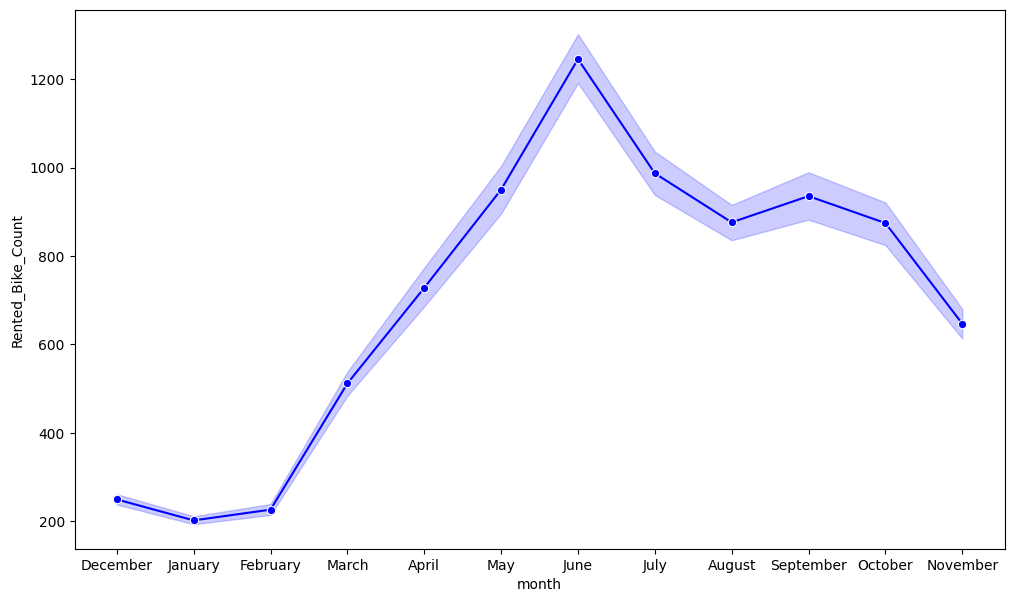

In [ ]:
# Chart - 3 visualization code

# Sum Of Rented Bikes According To Month

# Set the color palette for the plot to 'viridis'
sns.set_palette('viridis')

# Create a figure and axis with specified size for the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Create a line plot to visualize the total number of rented bikes per month
sns.lineplot(data=bike_df, x='month', y='Rented_Bike_Count', color='blue', marker='o')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

## I picked this bar chart because of:

1. **Clarity and Readability**:
   - "I chose this chart because it clearly represents the relationship between the variables I’m analyzing. For example, a bar chart is great for comparing the counts or values across different categories like months."

2. **Data Type**:
   - "The data contains categorical values (e.g., months) and a continuous variable (e.g., the count of rented bikes), which makes a bar plot the ideal choice for visualizing the total bike rentals across different months."

3. **Insight Extraction**:
   - "The bar chart makes it easy to compare bike rentals across months, spot trends, and quickly identify which months have the highest or lowest rentals."

4. **Simplicity**:
   - "I wanted a simple and intuitive visualization that could convey the information without overwhelming the viewer. The bar plot effectively does this while still allowing for easy customization, such as adding color gradients for better distinction."


##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the **monthly bike rental counts**, here are some key insights:

1. **Seasonal Trends**:
   - Bike rentals are **highest in June**, with a peak count of over 1200. This suggests that summer months may see increased bike usage, likely due to favorable weather conditions.
   - The **lowest rentals** occur in **January** and **February**, which are winter months. This could be due to colder weather, making bike riding less appealing or feasible.

2. **Steady Increase in Spring**:
   - From **March to June**, there is a steady increase in bike rentals, indicating a rise in demand as temperatures warm up in the spring.

3. **Post-Summer Decline**:
   - After the peak in June, the bike rentals begin to gradually decrease from **July through November**, which likely corresponds to the end of summer and the start of cooler weather.

4. **Stable Rental Counts**:
   - The months of **July to September** have relatively stable rental counts, suggesting consistent bike usage during the late summer and early fall.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact:
The gained insights from the chart can definitely help create a **positive business impact**:

1. **Seasonal Demand Optimization**:
   - The clear peak in bike rentals during **summer months (May, June, July)** suggests a higher demand for bike rentals during this period. This can guide the business to **increase inventory** (more bikes available), **extend service hours**, or **offer promotional packages** during these months to maximize revenue.
   
2. **Targeted Marketing**:
   - The insight that rentals are lowest in **winter months (January, February)** can help the business create **special marketing campaigns** or discounts to **attract more customers** during this off-peak season. The business could also explore renting bikes with better weather protection or promoting alternative activities to boost engagement.
   
3. **Resource Allocation**:
   - The company can **optimize resource allocation** (e.g., staff, bike maintenance) by aligning efforts with rental demand. For instance, more staff can be deployed and maintenance checks can be scheduled ahead of the busy summer season, reducing downtime.

### Negative Growth Insights:
There aren’t direct insights that indicate **negative growth**, but the following factors could **hinder growth** if not addressed:

1. **Low Rentals in Winter**:
   - The **sharp decline in rentals during winter months (January, February)** could negatively impact revenue. If the business heavily relies on year-round operations, this seasonal dip may pose a challenge. However, this can be mitigated by offering alternative winter services (e.g., electric bikes, guided city tours, or bike maintenance services during the off-season).
   
2. **Saturation in Peak Season**:
   - The **high demand during summer** may result in operational challenges if the business is not prepared. If there aren't enough bikes or the infrastructure isn't capable of handling the increased traffic, customer dissatisfaction may rise. If customers experience shortages or long waits, it could lead to **missed revenue opportunities** and potential **negative customer feedback**.



#### Chart - 4

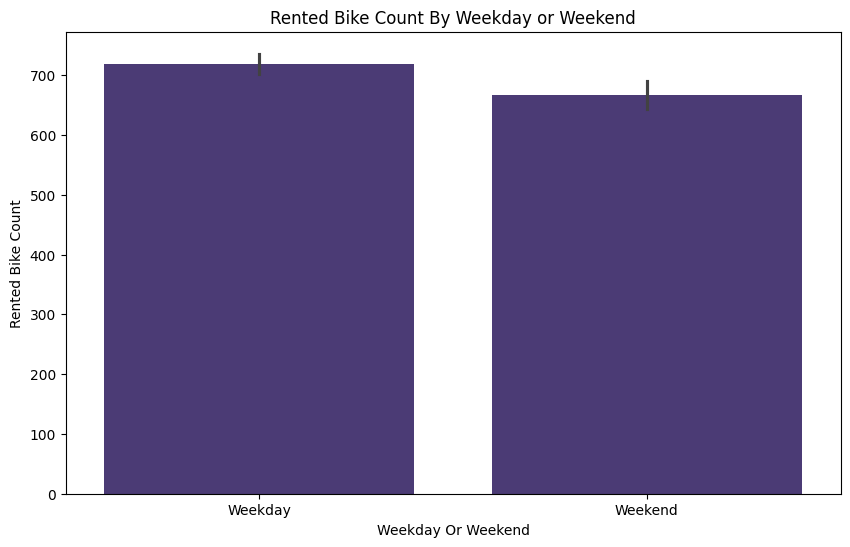

In [ ]:
# Chart - 4 visualization code

# Rented bike count by weekdays or weekends

# Create a figure and axis with specified size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot to visualize the count of rented bikes based on whether the day is a weekday or weekend
sns.barplot(x=bike_df['weekday_or_weekend'], y=bike_df['Rented_Bike_Count'])

# Set the title of the plot to indicate what the data represents
plt.title('Rented Bike Count By Weekday or Weekend')

# Label the x-axis
plt.xlabel('Weekday Or Weekend')

# Label the y-axis
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **bar chart** because it is an effective way to compare the **average bike rental count** between two distinct categories: **Weekday** and **Weekend**. The goal is to analyze the differences in bike rental patterns across these two time periods.

### Reasons for choosing this chart:

1. **Category Comparison**:
   - Bar charts are ideal for **comparing categorical data**, such as the difference in bike rentals between weekdays and weekends. Each bar represents a different category, making it easy to visualize the comparison at a glance.

2. **Clear Representation of Averages**:
   - The bar chart effectively displays the **average rented bike count** for each category. This helps in understanding how the bike rentals fluctuate between weekdays and weekends.

3. **Incorporation of Error Bars**:
   - The addition of **error bars** provides insights into the **variability** of bike rentals within each category, making the chart more informative by indicating the **range of uncertainty** or **standard deviation** around the average.

4. **Simple and Straightforward**:
   - For this analysis, the bar chart is straightforward and allows for **quick interpretation** of the data. It shows the general trend of higher rentals on weekdays compared to weekends in an easy-to-understand format.

5. **Highlighting Differences in Usage Patterns**:
   - The bar chart makes it easy to spot the slight difference in bike rental counts between weekdays and weekends. This could be crucial for businesses trying to plan inventory or staffing based on rental patterns.



##### 2. What is/are the insight(s) found from the chart?

### **Insights from the Chart:**

1. **Higher Average Rentals on Weekdays**:
   - The chart reveals that **bike rentals are slightly higher on weekdays** compared to weekends. This suggests that people tend to use bikes more frequently during the weekdays, possibly for commuting purposes like work or school.

2. **Relatively Consistent Demand**:
   - Although rentals are slightly higher on weekdays, the difference between **weekday and weekend rentals is not very large**. This indicates that there is a relatively **steady demand for bikes throughout the week**, with no drastic fluctuations between these two categories.

3. **Narrow Error Bars Indicate Stability**:
   - The **error bars are narrow**, indicating that there is **not much variability** in the data within each category. This suggests that bike rental patterns are fairly **consistent** both on weekdays and weekends, which is a positive sign for maintaining stable operations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact Insights:**

1. **Targeted Marketing Strategies**:
   - Knowing that **weekdays have a higher rental count** allows businesses to tailor marketing efforts, such as promotions or discounts, specifically aimed at commuters. For instance, **offering discounts on weekday rentals** could attract more customers during peak usage times.

2. **Resource Allocation**:
   - The relatively consistent demand throughout the week indicates that businesses should ensure they have sufficient bikes available every day, rather than just ramping up for weekends. This can help optimize **staffing levels** and inventory management, ultimately leading to increased efficiency and cost savings.

3. **Enhanced Customer Engagement**:
   - Understanding that customers are active on weekdays could lead businesses to enhance engagement strategies, like partnerships with local businesses or organizations to promote **bike usage for commuting**, thereby increasing rentals further.

### **Negative Growth Insights and Justifications:**

1. **Limited Weekend Demand**:
   - The chart shows that **weekend rentals are significantly lower than weekdays**, which could indicate an opportunity cost for businesses. If a significant portion of their marketing or service offerings is focused on weekends, this could lead to **inefficiencies and wasted resources**.

   - **Negative Impact**: If the business over-invests in resources or marketing aimed at weekend rentals without understanding the low demand, this could result in financial losses due to **low return on investment**.

2. **Potential Over-Reliance on Weekday Commuters**:
   - The data suggests a strong reliance on weekday rentals, which may make the business vulnerable to fluctuations in commuter patterns (e.g., changes in remote work policies or transportation trends).

   - **Negative Impact**: If weekday usage declines (for instance, due to more people working from home), the business may face a **sharp decrease in revenue**, highlighting the need for a more balanced approach to attract customers on weekends.

3. **Underestimating Weekend Potential**:
   - The relatively low rentals on weekends might indicate a **missed opportunity** for attracting recreational users or tourists who could potentially rent bikes for leisure activities. Failing to tap into this market could restrict growth.

   - **Negative Impact**: Without specific strategies to encourage weekend rentals (like events, tours, or partnerships with local attractions), the business might limit its overall revenue potential, which could hinder growth and market expansion.

#### Chart - 5

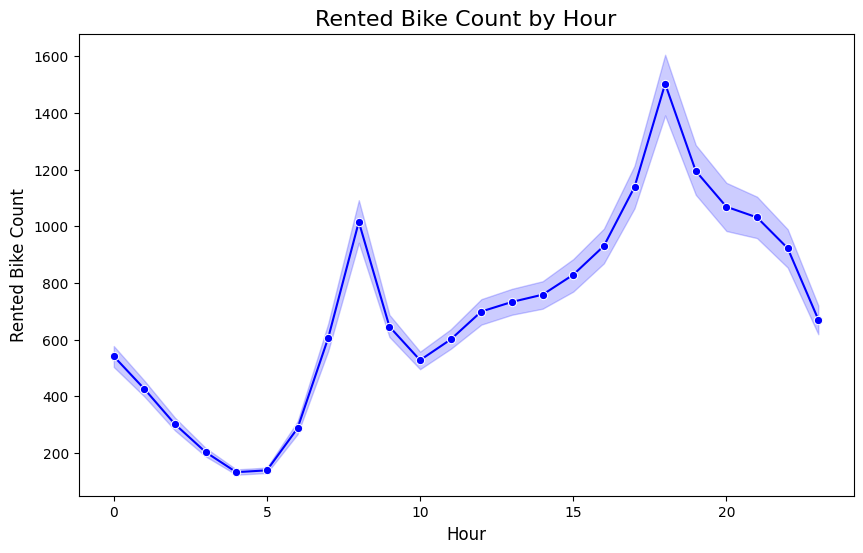

In [ ]:
# Chart - 5 visualization code

# Plotting the graph to analyze Rented Bike Count By Hour

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a line plot to visualize the relationship between the hour of the day and the count of rented bikes
sns.lineplot(x='Hour', y='Rented_Bike_Count', data=bike_df, marker='o', color='b')

# Set the title of the plot with a larger font size
plt.title('Rented Bike Count by Hour', fontsize=16)

# Label the x-axis with a larger font size
plt.xlabel('Hour', fontsize=12)

# Label the y-axis with a larger font size
plt.ylabel('Rented Bike Count', fontsize=12)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **line chart** because it effectively visualizes the **bike rental count by hour** across a 24-hour period, highlighting fluctuations in rentals throughout the day.

### Reasons for choosing this chart:

1. **Time Series Analysis**:
   - Line charts are ideal for visualizing **data trends over time**. In this case, the chart clearly shows how bike rentals change hour by hour, making it easy to spot patterns related to daily usage.

2. **Identification of Peak and Low Periods**:
   - The line chart helps identify specific **peak hours** (e.g., around 8 AM and 6 PM) when bike rentals are highest, as well as **low periods** (e.g., early morning hours between 3-5 AM) when demand is low.

3. **Visualizing Continuous Data**:
   - Since the data is continuous (hourly bike counts), a line chart is the most appropriate way to connect the points smoothly and show how rentals fluctuate without abrupt breaks, as opposed to using a bar chart.

4. **Highlighting Trends and Patterns**:
   - The upward and downward trends throughout the day are clearly visible, allowing for easy interpretation of the typical bike rental behavior at different times, such as commute hours.

5. **Incorporation of Confidence Intervals**:
   - The shaded area around the line suggests that **confidence intervals** or **variability** are accounted for, offering additional insights into the uncertainty or consistency in rental patterns during specific hours.



##### 2. What is/are the insight(s) found from the chart?

### Insights from the chart:

1. **Morning and Evening Peaks**:
   - There are two prominent peaks around **8 AM** and **6 PM**, indicating high bike rental activity during **commuting hours**. This suggests that many users rent bikes to travel to work in the morning and back home in the evening.

2. **Low Demand During Early Morning Hours**:
   - The lowest bike rental count occurs between **1 AM and 5 AM**, likely due to reduced travel activity during late night and early morning hours.

3. **Midday Dip**:
   - After the morning peak, there's a noticeable dip in rentals around **10 AM to 12 PM**, which may indicate fewer users renting bikes during the late morning.

4. **Gradual Increase in Afternoon Rentals**:
   - After the midday dip, rentals steadily increase, peaking again at **6 PM**, which likely corresponds to the evening rush hour when people are returning home from work.

5. **Evening Decline**:
   - Following the 6 PM peak, the rental count gradually declines throughout the evening, suggesting a drop in demand as the day progresses into nighttime.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### **Positive Business Impact Insights:**

1. **Targeted Marketing Strategies**:
   - The chart reveals **peak rental times in the morning and evening**, suggesting that businesses can target **commuters**. For example, they could offer **morning or evening discounts** to attract more riders during these high-demand periods, increasing overall rentals.

2. **Resource Allocation**:
   - With clear **hourly demand patterns**, businesses can optimize **bike availability** during peak hours (e.g., 8 AM and 6 PM) and reduce availability during low-demand hours (e.g., 1-5 AM). This ensures efficient use of resources and minimizes unnecessary costs for maintenance and staffing during low-traffic times.

3. **Improved Customer Engagement**:
   - Businesses can engage customers by promoting bike rentals as a convenient **commuting option** during peak hours. Partnering with workplaces or local businesses to encourage biking as a sustainable transport option during commute times can help further boost rentals.

### **Negative Growth Insights and Justifications:**

1. **Underutilization During Low Demand Hours**:
   - The chart shows **low rental activity during early morning hours (1-5 AM)**. If businesses maintain bikes and allocate resources during this period without adjusting for lower demand, they may face **inefficiencies and increased costs** without corresponding revenue.
   
   - **Negative Impact**: Keeping bikes available during low-demand hours could result in **wasted resources** and higher operational costs, hurting profitability.

2. **Potential Over-Reliance on Peak Hours**:
   - The business might be **overly reliant** on peak hours (morning and evening), which makes it vulnerable to shifts in commuter behavior, such as changes in remote work trends or transportation preferences.
   
   - **Negative Impact**: If commuter patterns change (e.g., more people working from home), there could be a **decline in weekday rentals**, causing a sharp drop in revenue.

3. **Missed Opportunity During Off-Peak Hours**:
   - The **relatively low bike rental activity between 10 AM and 4 PM** suggests a missed opportunity to attract users during the day, such as **tourists or casual riders**. Without promotions or initiatives to boost off-peak rentals, businesses may miss out on additional revenue streams.

   - **Negative Impact**: By not capitalizing on off-peak hours, the business could limit its growth potential, as it fails to attract a broader customer base, particularly those who ride for leisure rather than commuting.

#### Chart - 6

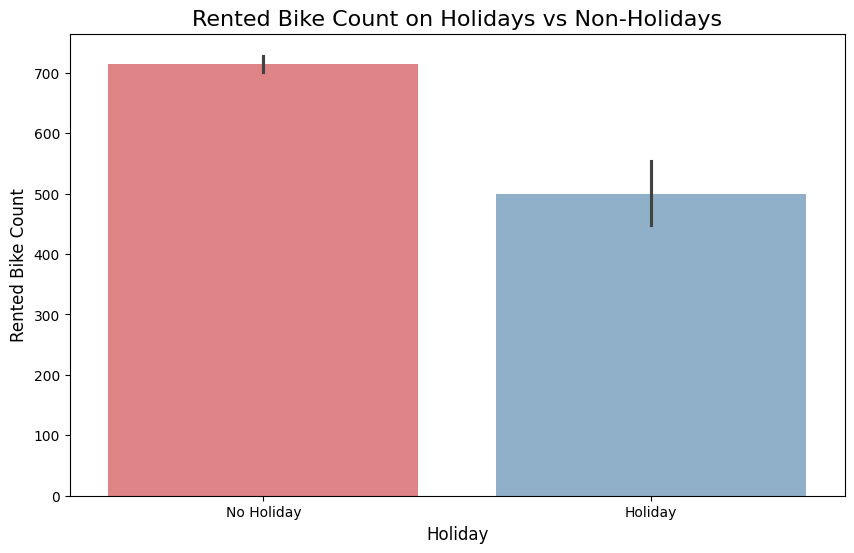

In [ ]:
# Chart - 6 visualization code

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='Rented_Bike_Count', data=bike_df, palette='Set1', alpha=0.6)

# Set the title and labels
plt.title('Rented Bike Count on Holidays vs Non-Holidays', fontsize=16)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I chose a bar chart because it effectively visualizes the **comparison** of bike rental counts between holidays and non-holidays, making it easy to see differences in demand based on the type of day.

**Reasons for choosing this chart:**

- **Categorical Data Comparison**: Bar charts are ideal for comparing two distinct categories—in this case, holidays versus non-holidays. It clearly shows which group has a higher count of bike rentals.
- **Easily Understandable**: The height of the bars provides an immediate, visual comparison between the two categories, making it simple to grasp the rental trends at a glance.
- **Handling Discrete Data**: Since the data involves discrete categories (holiday vs. non-holiday), a bar chart effectively represents the rental counts without needing to connect the values as you would in a line chart.
- **Error Bars for Variability**: The inclusion of error bars adds depth to the visualization, showing variability or confidence intervals around the average rental counts, which adds reliability to the insights.




##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**

- **Higher Bike Rentals on Non-Holidays**: The chart shows a significantly higher bike rental count on non-holidays compared to holidays, with around 700 rentals on non-holidays and about 500 rentals on holidays.
- **Impact of Holidays on Rentals**: The decrease in bike rentals during holidays could indicate lower commuting or recreational demand on these days, possibly due to people spending time indoors or using alternative modes of transportation.
- **Variability in Rentals**: The error bars show some variability in both categories, suggesting that while there are general trends, there may be fluctuations in bike rentals depending on specific holidays or non-holidays.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights**:

- **Targeted Promotions on Holidays**: Since bike rentals are lower on holidays, businesses can offer **discounts or special promotions** on holidays to encourage more riders to rent bikes, potentially increasing rentals during these periods.
- **Optimize Resource Allocation**: Knowing that demand is lower on holidays, companies can optimize **bike availability and staffing** during non-holidays when demand is higher, reducing unnecessary operational costs on low-demand days.
- **Data-Driven Marketing**: Understanding the difference in rentals between holidays and non-holidays allows for **targeted marketing** strategies, such as promoting bike rentals for leisure on holidays and for commuting on non-holidays.

**Negative Growth Insights and Justifications**:

- **Underutilization on Holidays**: If bike rental businesses continue to allocate the same resources on holidays as on non-holidays, they could face inefficiencies, such as too many bikes and staff available for fewer riders.
  
  **Negative Impact**: This mismatch in demand and resource allocation on holidays could lead to higher operational costs without a corresponding increase in revenue, negatively affecting profitability.

- **Potential Over-Reliance on Non-Holidays**: If the business relies heavily on non-holiday rentals, any disruption to non-holiday patterns (e.g., changes in commuting behavior or economic shifts) could result in a significant drop in revenue.

  **Negative Impact**: Relying on non-holidays without strategies to boost holiday rentals may limit the business's ability to grow and adapt to changing rider behavior.

#### Chart - 7

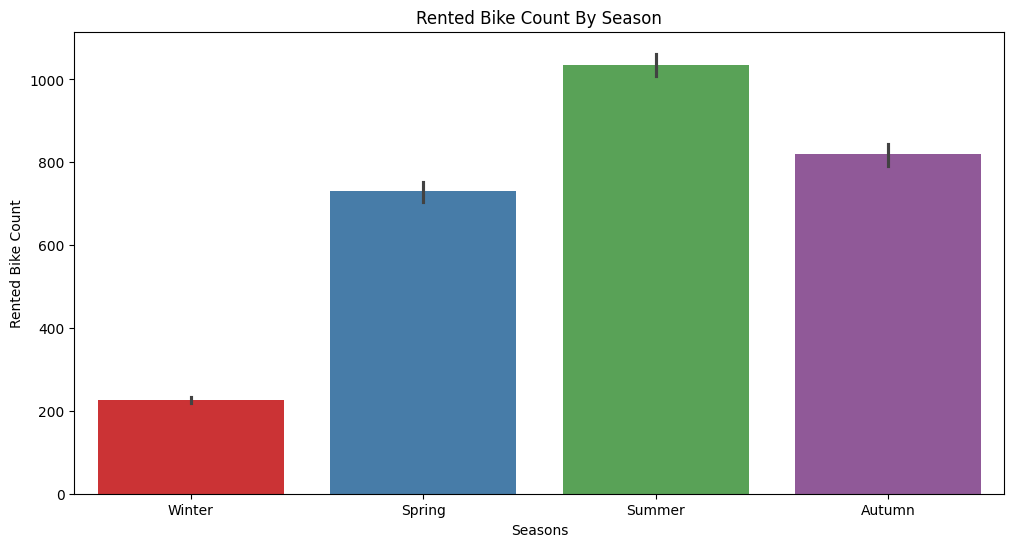

In [ ]:
# Chart - 7 visualization code

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the relationship between seasons and the count of rented bikes

sns.barplot(x=bike_df['Seasons'], y=bike_df['Rented_Bike_Count'], palette='Set1')

# Set the title of the plot to indicate what it represents
plt.title('Rented Bike Count By Season')

# Label the x-axis to indicate what the data represents
plt.xlabel('Seasons')

# Label the y-axis to indicate what the data represents
plt.ylabel('Rented Bike Count')

# Display the plot
plt.show()



##### 1. Why did you pick the specific chart?

I chose a bar chart because it effectively compares the **bike rental counts across different seasons** (Winter, Spring, Summer, and Autumn), making it easy to visualize and interpret seasonal patterns in rentals.

**Reasons for choosing this chart**:

- **Seasonal Data Comparison**: Bar charts are well-suited for comparing discrete categories like seasons. It clearly shows how bike rentals vary across different times of the year.
- **Easily Distinguishable Data**: The different bar heights for each season provide an immediate visual representation of which season has the highest and lowest bike rental counts.
- **Handling Discrete Categories**: Since the data is divided into distinct seasons, a bar chart is the most appropriate choice to visualize the data, as it separates and compares the bike rentals for each season.
- **Error Bars for Variability**: The chart includes error bars, indicating the variability or confidence in the bike rental counts, which helps understand the reliability of the data.



##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart**:

- **Summer Has the Highest Bike Rentals**: The summer season shows the highest bike rental count, exceeding 1000 rentals, indicating that bike demand peaks during this season, possibly due to favorable weather and outdoor activities.
- **Winter Has the Lowest Bike Rentals**: The winter season shows the lowest rental count, barely exceeding 200 rentals. This suggests that colder weather reduces the demand for bike rentals.
- **Spring and Autumn Show Moderate Rentals**: Spring and Autumn have moderate rental counts, with Spring rentals around 700 and Autumn rentals slightly below 900. This suggests that while these seasons are not as popular as Summer, they still maintain substantial rental activity.
- **Variability in Rental Counts**: The error bars indicate some variability in the bike rentals for each season, with more consistency in Winter rentals compared to the other seasons.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights**:

- **Seasonal Promotions**: Businesses can capitalize on the peak bike rentals in **Summer** by offering special promotions, packages, or loyalty programs to attract more users during this high-demand period.
- **Resource Optimization**: By recognizing the lower demand in **Winter**, businesses can reduce the number of bikes available, perform maintenance, or lower staffing during these months to minimize operational costs.
- **Target Spring and Autumn**: While Spring and Autumn show decent bike rental activity, businesses could further boost rentals by introducing **off-season discounts** or targeting tourists and casual riders during these transitional seasons.

**Negative Growth Insights and Justifications**:

- **Underutilization in Winter**: The very low demand for bike rentals during Winter may lead to **underutilization of resources** if the business allocates the same number of bikes or staff as in other seasons.
  
  **Negative Impact**: Keeping bikes readily available during Winter could lead to increased maintenance and operational costs without sufficient demand to justify them, which could negatively affect profitability.

- **Over-Reliance on Summer**: The significant spike in Summer rentals might create an **over-reliance** on this season for revenue. Any unexpected factors (e.g., poor weather, economic downturns) that impact Summer activity could harm the business's revenue.

  **Negative Impact**: Without diversifying strategies to boost rentals in other seasons, over-reliance on Summer rentals could expose the business to vulnerabilities during seasonal downturns, affecting overall growth.

#### Chart - 8

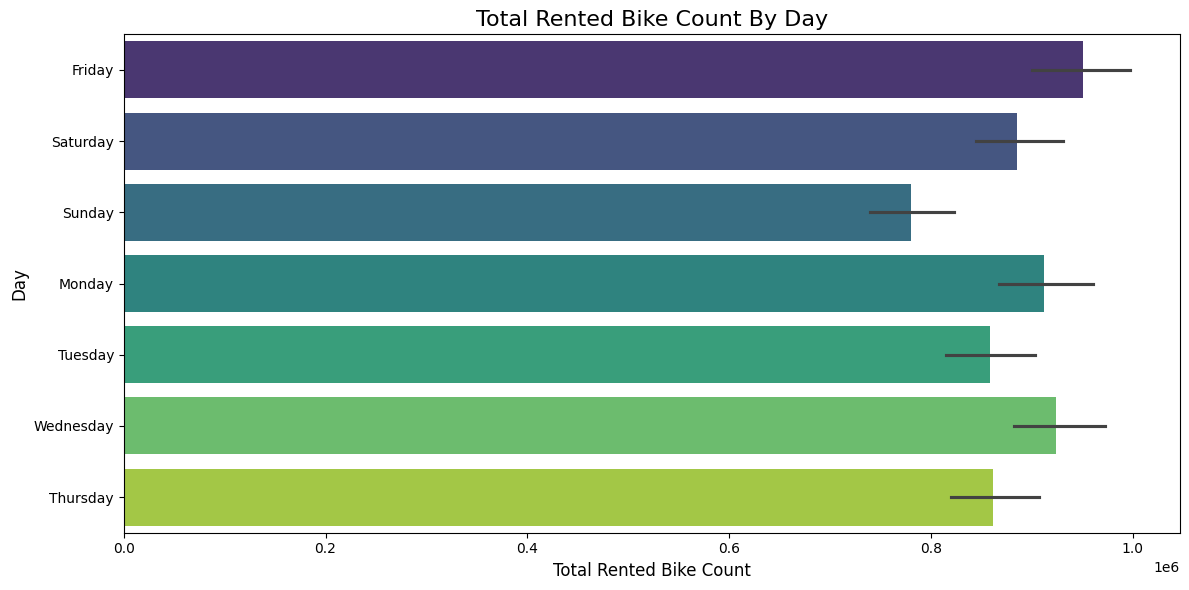

In [ ]:
# Chart - 8 visualization code


# Create a horizontal bar plot for weekly data
plt.figure(figsize=(12, 6))
sns.barplot(data=bike_df, x='Rented_Bike_Count', y='day', estimator=sum, palette='viridis')

# Set title and labels
plt.title('Total Rented Bike Count By Day', fontsize=16)
plt.xlabel('Total Rented Bike Count', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it effectively compares the total rented bike counts across different days of the week. This type of chart is easy to interpret and helps visualize how bike rentals fluctuate depending on the day.

**Reasons for choosing this chart:**
- **Day-wise Data Comparison**: Bar charts are ideal for comparing discrete categories like days. It clearly illustrates how bike rentals vary from Monday to Sunday.
- **Easily Distinguishable Data**: The different bar lengths provide a clear and immediate visual representation of which day has the highest and lowest rental counts.
- **Handling Discrete Categories**: Since the data is divided into specific days, a bar chart is the most appropriate choice to separate and compare the bike rentals for each day.
- **Error Bars for Variability**: The inclusion of error bars indicates the variability or uncertainty in the bike rental counts, giving insight into the reliability of the data.








##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**
- **Friday Has the Highest Bike Rentals**: Friday shows the highest bike rental count, suggesting that demand peaks just before the weekend, possibly due to leisure activities or weekend travel.
- **Saturday and Thursday Are Notable**: Saturday also shows high rentals, indicating that weekends are popular for bike usage. However, Thursday has the lowest rentals, which may suggest lower demand toward the end of the workweek.
- **Steady Increase Towards the Weekend**: There is a visible increase in bike rentals from Monday to Friday, possibly driven by commuters or people preparing for the weekend.
- **Variability in Rentals**: The error bars show that while most days have relatively consistent rentals, there is some variability, which could point to external factors like weather conditions affecting the counts.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**
- **Target High-Demand Days**: Businesses can capitalize on the high demand on Fridays and Saturdays by offering promotions or additional services (e.g., group rentals or discounts) during these days to attract more customers.
- **Optimize Resource Allocation**: Knowing that Thursday has the lowest demand, businesses can reduce bike availability or staff on this day, optimizing resources while still meeting customer needs.
- **Weekend Promotions**: Since the weekend shows higher rentals, businesses can introduce weekend-specific marketing campaigns to further boost rentals and customer engagement.

**Negative Growth Insights and Justifications:**
- **Underutilization on Thursdays**: The significantly lower rentals on Thursday could lead to resource underutilization, where bikes and staff are not fully used, potentially increasing operational costs without sufficient revenue.
  - **Negative Impact**: If resources are not adjusted accordingly, this could affect profitability due to inefficient operations during low-demand periods.
  
- **Over-Reliance on Fridays**: The peak in rentals on Friday may cause over-reliance on one day of the week for revenue. If any disruptions occur (such as bad weather or event cancellations), it could negatively impact the business.
  - **Negative Impact**: Focusing too much on Friday could make the business vulnerable to revenue losses if the expected high demand drops unexpectedly.



#### Chart - 9

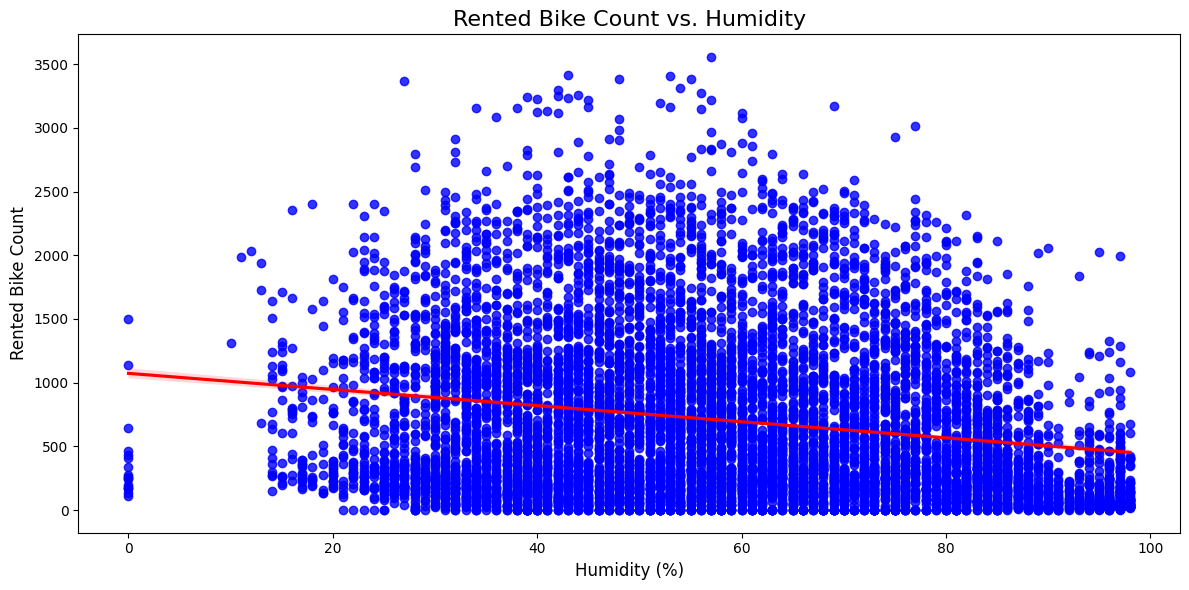

In [ ]:
# Chart - 9 visualization code


# Create the scatter plot with a trend line
plt.figure(figsize=(12, 6))
sns.regplot(data=bike_df, x='Humidity', y='Rented_Bike_Count',
            marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set title and labels
plt.title('Rented Bike Count vs. Humidity', fontsize=16)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot to explore the relationship between bike rentals and humidity. A scatter plot is ideal for examining the correlation between two continuous variables, in this case, "Humidity (%)" and "Rented Bike Count."

**Reasons for choosing this chart:**
- **Relationship Between Variables**: Scatter plots effectively show the distribution of data points and any visible trend or correlation between humidity and bike rentals.
- **Data Spread Representation**: The spread of the points clearly illustrates how bike rentals behave across different humidity levels, allowing for easier identification of patterns or outliers.
- **Trend Line for Insight**: Including a trend line (in red) helps to indicate the general direction of the relationship between humidity and bike rentals, even if the correlation is weak or unclear.
- **Visualization of Density**: The plot also highlights data density, showing which humidity levels are associated with a higher concentration of bike rentals.

  



##### 2. What is/are the insight(s) found from the chart?


**Insights from the chart:**
- **Slight Negative Correlation**: There is a slight negative trend between humidity and bike rentals. As humidity increases, the number of rented bikes appears to slightly decrease, indicating that higher humidity might slightly discourage bike rentals.
- **Wide Distribution of Rentals**: The data points are widely scattered, showing that bike rentals occur at various humidity levels, but the majority of rentals are concentrated in the lower to mid-range humidity levels (0% to 60%).
- **High Rentals at Lower Humidity**: There is a higher concentration of rentals around lower humidity levels (between 10% and 40%), suggesting that people may prefer to rent bikes when the weather is less humid.
- **Outliers and Clustering**: There are some outliers where a significant number of bikes were rented even at very high humidity levels, but these are exceptions, not the norm.
  



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**
- **Target Low Humidity Days**: Businesses can leverage this slight correlation by promoting bike rentals more aggressively on days with lower humidity. Special discounts or packages could be offered during those days to increase rentals.
- **Adapt to Customer Preferences**: Recognizing that rentals decrease slightly with rising humidity, businesses could provide amenities like water bottles, cooling towels, or discounts on those days to make rentals more appealing despite higher humidity.
- **Weather-Based Promotions**: By monitoring the weather, businesses can send targeted promotions to customers on days with favorable humidity levels, optimizing rental opportunities when demand is expected to be higher.

**Negative Growth Insights and Justifications:**
- **Reduced Rentals in High Humidity**: Since higher humidity correlates with slightly fewer bike rentals, businesses might experience lower demand on humid days, especially during peak summer months when humidity is higher.
  - **Negative Impact**: If businesses don’t adjust their strategies for humid days (e.g., offering incentives), they could face lower revenue during these periods, impacting profitability.

- **Overlooking Preferences**: If businesses do not pay attention to weather trends, they might miss opportunities to cater to customer preferences regarding humidity, leading to decreased customer satisfaction and engagement.
  - **Negative Impact**: Not addressing the impact of weather on customer behavior could lead to a gradual decline in rentals during unfavorable conditions, affecting overall growth and customer loyalty.



#### Chart - 10

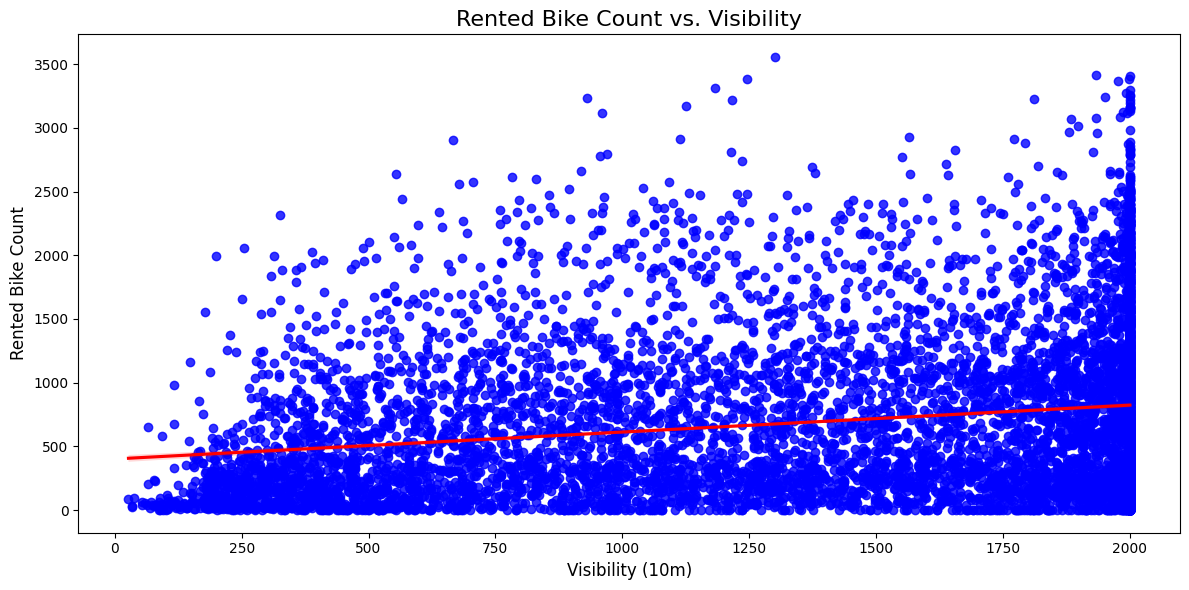

In [ ]:
# Chart - 10 visualization code

# Create the scatter plot with a trend line for Visibility vs. Rented Bike Count
plt.figure(figsize=(12, 6))
sns.regplot(data=bike_df, x='Visibility', y='Rented_Bike_Count',
            marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set title and labels
plt.title('Rented Bike Count vs. Visibility', fontsize=16)
plt.xlabel('Visibility (10m)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot to investigate the relationship between bike rentals and visibility. This type of chart is particularly useful for examining how changes in visibility affect the number of rented bikes.

**Reasons for choosing this chart:**
- **Correlation Exploration**: Scatter plots are effective for visualizing the potential correlation between two continuous variables, in this case, "Visibility (in 10 meters)" and "Rented Bike Count."
- **Pattern Identification**: The chart helps in identifying any upward or downward trends in bike rentals with changes in visibility, allowing for insights into how weather conditions might affect rental behavior.
- **Density and Spread**: It provides a clear view of how the data points are spread across different visibility ranges, showing the concentration of rentals at various visibility levels.
- **Trend Line**: The inclusion of a trend line (in red) helps indicate whether there is a significant correlation between visibility and bike rentals.




##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**
- **Slight Positive Correlation**: The trend line suggests a slight positive correlation between visibility and bike rentals. As visibility improves, the number of bike rentals slightly increases, implying that clearer visibility might encourage more people to rent bikes.
- **High Rentals at Medium to High Visibility**: There is a higher concentration of bike rentals when visibility is above 500 meters, with a noticeable increase in rentals as visibility improves further. This suggests that people may be more inclined to rent bikes when they can see clearly and conditions are less foggy or obstructed.
- **Wide Distribution Across Visibility Levels**: While rentals occur across the entire range of visibility, there is a denser cluster of points between 0 and 1000 meters, indicating that bike rentals are more common within these ranges.
- **Outliers**: Some rentals are still happening at very low visibility levels, although they are outliers and not as frequent as in better visibility conditions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**
- **Target High Visibility Days**: The positive correlation with visibility suggests that businesses can promote bike rentals on days with good weather and clear visibility. Offering special deals or marketing these days as optimal for biking could boost rentals.
- **Visibility-Driven Promotions**: To capitalize on days with lower visibility, businesses could offer protective gear like bike lights or reflective clothing, making customers feel safer despite reduced visibility.
- **Weather-Related Adjustments**: Understanding that rentals drop slightly when visibility decreases allows businesses to prepare for such days by optimizing resources, reducing bike availability, or promoting other services during low-visibility conditions.

**Negative Growth Insights and Justifications:**
- **Lower Rentals During Low Visibility**: The slight reduction in rentals as visibility decreases suggests that businesses could experience lower revenue on foggy or poor visibility days.
  - **Negative Impact**: If businesses do not prepare for these days by adjusting marketing strategies or offering visibility-enhancing equipment, they might miss out on revenue opportunities or see a dip in rentals.
  
- **Missed Opportunities During Peak Visibility**: Failing to promote high visibility days, when rentals are higher, could result in missed opportunities to increase revenue.
  - **Negative Impact**: Without active promotion during optimal visibility conditions, businesses may not fully capitalize on periods when customers are more likely to rent bikes, limiting potential growth.



#### Chart - 11

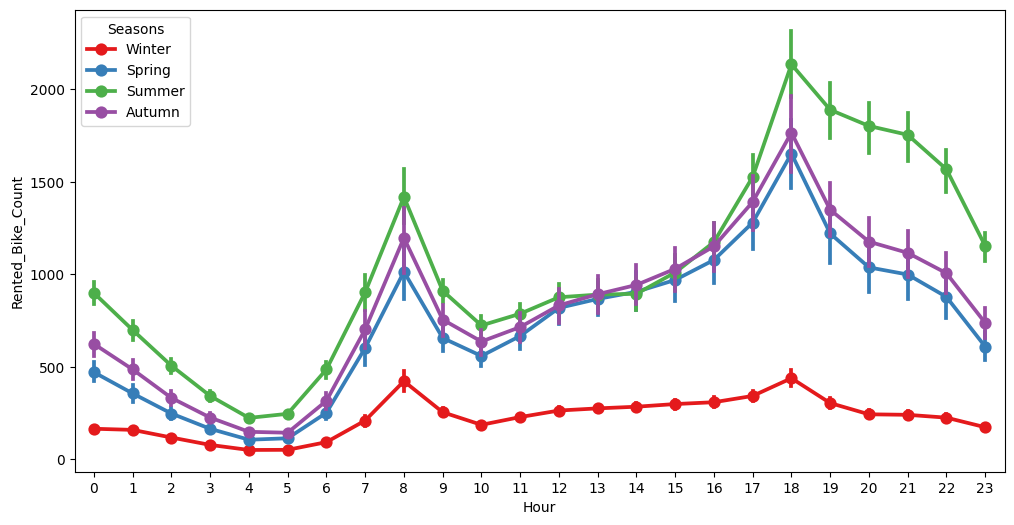

In [ ]:
# Chart - 11 visualization code

# Create a figure and axis with a specified size for the plot
fig = plt.subplots(figsize=(12, 6))

# Create a point plot to visualize the relationship between the hour of the day and the count of rented bikes
sns.pointplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Seasons', palette='Set1')

# Set the title of the plot to indicate what it represents
ax.set(title='Count of Rented Bikes According to Seasons')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose this **line chart with error bars** to explore how bike rental patterns change throughout the day across different seasons. The line chart is particularly suitable for visualizing trends over time (hours in this case), and the use of different colors for each season helps differentiate patterns clearly.

**Reasons for choosing this chart:**
- **Time-based Trends**: Line charts are ideal for showing trends over time, and here it illustrates how bike rentals vary by hour across seasons.
- **Comparison Across Seasons**: The chart clearly shows seasonal differences, highlighting how external factors like weather (linked to seasons) impact the number of rentals.
- **Error Bars for Uncertainty**: The error bars give a sense of the variability or confidence in the bike rental counts, offering insights into the data's consistency at different times of day.
- **Peaks and Valleys**: This type of chart makes it easy to identify key peaks (rush hours) and valleys (quiet periods), which can reveal customer behavior and demand patterns.



##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**
- **Clear Peaks During Commuting Hours**: There are two major peaks—one in the morning around 8 AM and another in the evening around 5-6 PM. This trend is consistent across Spring, Summer, and Autumn, reflecting higher demand during commuting times.
- **Summer Dominates Rentals**: The number of rentals is highest in Summer during the day, with significant activity especially during commuting hours, suggesting that warm weather encourages more people to use bikes.
- **Winter Shows Minimal Rentals**: In contrast, Winter shows significantly fewer rentals throughout the day, with no major peaks, indicating that cold weather likely discourages biking.
- **Gradual Rise in the Afternoon**: In Spring, Summer, and Autumn, rentals steadily increase after midday, peaking in the evening. This could reflect leisure activities or people returning from work.
- **Nighttime and Early Morning Low Rentals**: Regardless of the season, bike rentals remain very low between midnight and the early hours (until around 5-6 AM), which might be due to colder temperatures, less daylight, and fewer people needing to commute.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**
- **Focus on Commuter Hours**: The significant spikes in rentals during the morning (around 8 AM) and evening (around 6 PM) across most seasons suggest that targeting commuters could boost business. Offering promotional deals during these times or ensuring ample bike availability can maximize rental opportunities.
- **Seasonal Marketing**: Summer shows the highest rental activity, so businesses should capitalize on this by ramping up marketing, offering discounts, and ensuring bike availability during peak hours in the summer.
- **Resource Optimization in Winter**: With the drop in winter rentals, businesses can adjust their inventory or reduce services during winter months to cut costs and focus on alternative ways to drive business (e.g., offering heated bike stations or promoting other transport options).
- **Evening and Afternoon Opportunities**: Since rentals rise steadily in the late afternoon, businesses could also promote leisure rides during these hours, especially in seasons like Summer and Autumn.

**Negative Growth Insights and Justifications:**
- **Low Winter Rentals**: The lack of major peaks during winter hours might lead to reduced revenue during this season. If businesses rely too heavily on year-round bike rentals without diversifying, they could face significant slowdowns in winter.
  - **Negative Impact**: Without alternative revenue strategies (e.g., winter gear promotions, other services), the winter season might lead to reduced profits.
  
- **Underutilizing Commuter Patterns**: If businesses don't fully utilize the peak hours in the morning and evening, they might miss out on the largest rental opportunities.
  - **Negative Impact**: Not aligning promotions, availability, or targeted offers during peak commuting hours could mean missing key revenue periods.
  
- **Ignoring Non-Summer Growth**: While summer shows high rental activity, Spring and Autumn also have significant peaks. Focusing only on summer without acknowledging the potential in these other seasons could lead to underperformance during otherwise profitable times.



#### Chart - 12

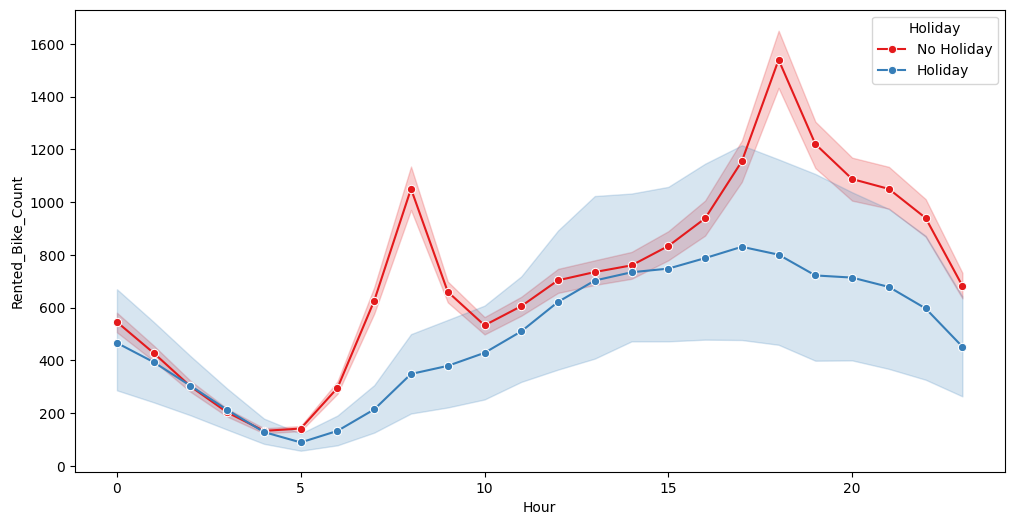

In [ ]:
# Chart - 12 visualization code

# Analysis of data through visualization
# Create a figure and axis with a specified size for the plot
fig = plt.subplots(figsize=(12, 6))

# Create a line plot to visualize the relationship between hour of the day and rented bike count

sns.lineplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='Holiday', palette='Set1', marker='o')

# Set the title of the plot to indicate what it represents
ax.set(title='Count of Rented Bikes According to Holiday')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?


I chose a **line chart with shaded confidence intervals** to compare bike rental patterns on holidays and non-holidays throughout the day. This chart is effective in visualizing the differences in rental behavior across these two categories while accounting for variability using the shaded areas.

**Reasons for choosing this chart:**
- **Time Series Comparison**: The line chart helps visualize the trends of bike rentals across different hours of the day for both holidays and non-holidays.
- **Dual Comparison**: The use of two lines (red for no holiday, blue for holiday) allows for a clear and direct comparison of how bike rentals vary between these two conditions.
- **Error Visualization**: The shaded regions represent uncertainty or variability in the data, helping to assess how confident we are about the observed trends.
- **Peaks and Patterns**: The chart makes it easy to identify key times when rentals are higher or lower during the day, showing how holidays influence biking behavior.






##### 2. What is/are the insight(s) found from the chart?

The chart shows the number of rented bikes over the course of a day, comparing holidays and non-holidays. Here are some key insights:

- **Morning Peak (around 8 AM)**: Both on holidays and non-holidays, there is a significant peak in bike rentals. However, on non-holidays, the peak is much higher, suggesting heavy morning commuting by bike on regular workdays.
  
- **Evening Peak (around 5-6 PM)**: There is another peak later in the day, possibly indicating evening commuting. Again, the peak is more pronounced on non-holidays compared to holidays.
  
- **Overall Trend**: On non-holidays, bike rentals are consistently higher throughout the day, especially during the commuting hours (morning and evening). On holidays, the rental activity is steadier, with lower peaks and a more gradual rise and fall.

- **Holiday vs. Non-Holiday**: On holidays, bike rentals are more evenly distributed, without the sharp spikes seen on non-holidays. This could reflect leisure usage, while non-holiday rentals show a clear pattern of workday commuting.

The shaded areas likely represent a confidence interval or variance, showing greater variability in rentals during peak commuting hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**
- **Target Commuters on Non-Holidays**: The sharp peaks in bike rentals during commuting hours (8 AM and 6 PM) on non-holidays suggest that businesses can focus on commuters by offering promotions or ensuring bike availability during these hours. This could lead to increased rentals during the workweek.
- **Leisure Activities on Holidays**: The steady rise in rentals during holidays suggests an opportunity to promote bikes for recreational use. Offering packages for families or tourists on holidays might capitalize on this trend.
- **Afternoon Promotions on Holidays**: Since rentals tend to peak in the afternoon on holidays, businesses could offer special afternoon deals to encourage more bike rentals during that period, catering to leisure riders.
- **Prepare for High Demand in the Evening**: Both holidays and non-holidays see a rise in the evening, so ensuring adequate bike availability during this time can help meet demand and improve customer satisfaction.

**Negative Growth Insights and Justifications:**
- **Lower Rentals on Holidays**: The overall lower rental count on holidays could negatively impact revenue if the business doesn't adjust. Without adapting by promoting bikes for leisure activities, businesses may see a drop in rentals on holidays.
  - **Negative Impact**: If holiday demand isn't actively encouraged, businesses may experience a decrease in income, particularly if they don't compensate with targeted offers or incentives for holiday riders.
  
- **Missing Non-Commuting Opportunities**: The lack of major peaks during non-holiday commuting hours could indicate missed opportunities to promote biking for purposes other than commuting, such as fitness or tourism.
  - **Negative Impact**: Relying solely on commuting peaks without addressing other potential riders might limit overall growth, especially during holidays when rentals are more spread out throughout the day.



#### Chart - 13

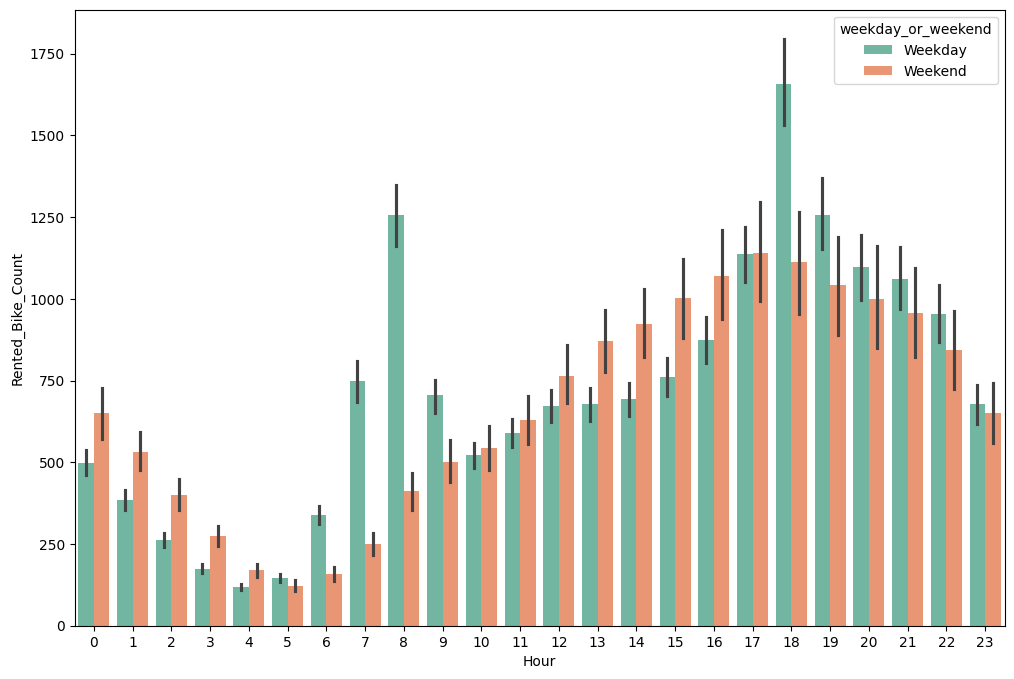

In [ ]:
# Chart - 13 visualization code

# Analysis of data through visualization
# Create a figure and axis with a specified size for the plot
fig = plt.subplots(figsize=(12, 8))

# Create a bar plot to visualize the rented bike counts by hour, differentiated by weekday or weekend

sns.barplot(data=bike_df, x='Hour', y='Rented_Bike_Count', hue='weekday_or_weekend', palette='Set2')

# Set the title of the plot to indicate what it represents
ax.set(title='Count of Rented Bikes According to Weekdays and Weekends')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **bar chart** to compare bike rental counts across different hours of the day, segmented by weekdays and weekends. This chart effectively visualizes the differences in bike rental patterns based on the day type, allowing for easy comparisons between the two categories.

**Reasons for choosing this chart:**

- **Categorical Comparison**: The bar chart clearly distinguishes between weekdays (in green) and weekends (in orange), making it easy to see the variations in bike rentals across different hours.
  
- **Time-Based Visualization**: By plotting the hours of the day on the x-axis, the chart effectively displays the time-dependent nature of bike rentals, helping to identify peak usage times.

- **Error Representation**: The inclusion of error bars allows for a visual representation of variability in bike rentals, providing insight into the consistency of rental counts throughout the day.

- **Peak Identification**: The chart highlights specific hours where bike rentals peak, illustrating how usage differs based on whether it is a weekday or weekend.


##### 2. What is/are the insight(s) found from the chart?

The bar chart provides several key insights into bike rental behavior based on visibility and time:

- **Peak Rental Times**: The chart reveals that bike rentals peak during morning and evening commuting hours on weekdays, indicating high demand during these times.

- **Weekday vs. Weekend Trends**: Rentals are generally higher on weekdays, particularly during rush hours (around 8 AM and 6 PM), suggesting that weekdays attract more commuter usage. In contrast, weekend rentals, while consistent, do not reach the same peaks as weekdays.

- **Lower Weekend Demand**: The data suggests that weekends may be underutilized for bike rentals, as the overall counts are lower compared to weekdays, indicating potential for growth in recreational biking on weekends.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**

- **Target Commuters on Weekdays**: The significant rental peaks during commuting hours on weekdays indicate that businesses can enhance their marketing strategies by targeting commuters. Promotions or ensuring bike availability during these peak hours can lead to increased rentals.

- **Weekend Promotions**: The consistent usage on weekends suggests opportunities for promoting bikes for leisure activities. Targeted marketing campaigns aimed at families or tourists on weekends could help capture this segment.

- **Afternoon Deals**: The steady rental numbers during afternoon hours on weekends provide an opportunity to introduce special promotions or packages, encouraging more rentals during those times.

**Negative Growth Insights and Justifications:**

- **Lower Rentals on Weekends**: The overall lower bike rental counts on weekends could negatively impact revenue if not addressed. Without targeted promotions to encourage leisure riding, businesses may experience reduced rentals during these days.

  - **Negative Impact**: If businesses fail to adapt to the weekend demand, they may face a decrease in income, especially if they rely solely on weekday commuter rentals.

- **Missed Opportunities for Non-Commuting Rentals**: The lack of significant peaks during non-holiday hours could indicate missed opportunities to attract riders for purposes other than commuting, such as fitness or tourism.

  - **Negative Impact**: By focusing solely on peak commuting hours, businesses may limit their growth potential, particularly during weekends when rental patterns are more spread out. Expanding their marketing strategies to include leisure activities can help mitigate this issue.



#### Chart - 14 - Correlation Heatmap

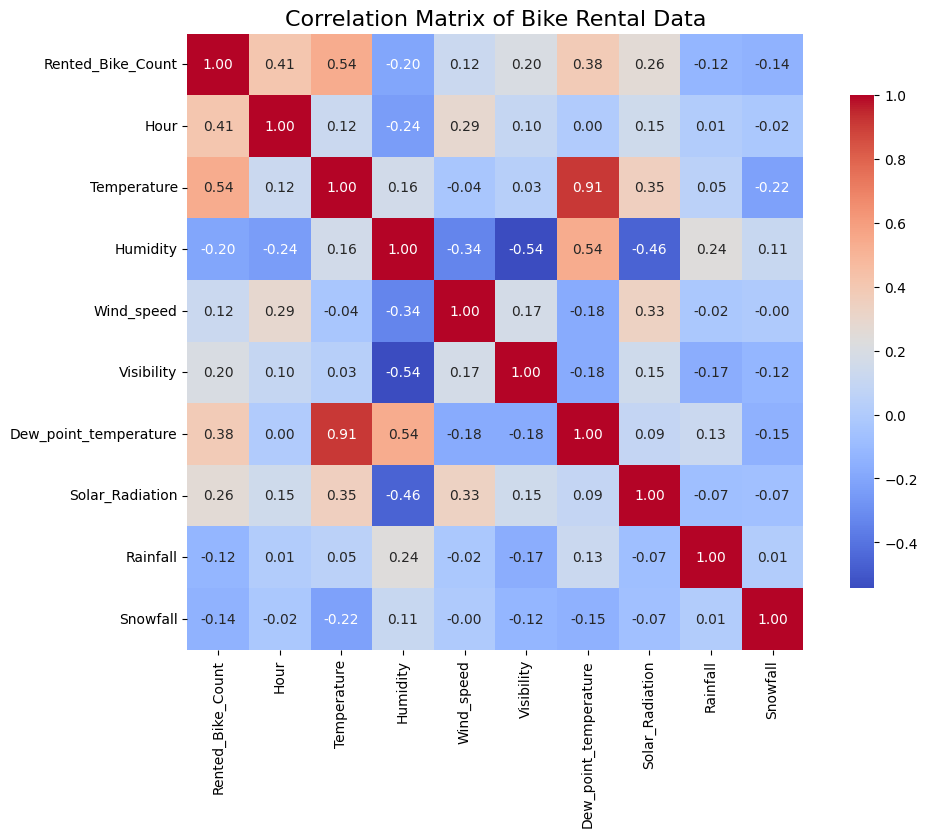

In [ ]:
# Correlation Heatmap visualization code
# Drop non-numeric columns for correlation analysis
numeric_df = bike_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix of Bike Rental Data', fontsize=16)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a **correlation matrix** because it is the most effective way to visualize the relationships between continuous numerical variables, showing both the strength and direction of the relationships across various features in the dataset.

#### Reasons for choosing this chart:
- **Visualizing Relationships**: The correlation matrix easily conveys how strongly variables are related to each other, with positive correlations shown in red and negative correlations in blue.
- **Multi-Variable Overview**: This chart provides a comprehensive view of how all variables are interconnected, which is critical for understanding potential drivers of bike rentals.
- **Ease of Interpretation**: The color gradients help quickly interpret the magnitude and direction of correlations without needing to go through complex statistical tables.






##### 2. What is/are the insight(s) found from the chart?



The correlation matrix provides key insights into relationships between variables affecting bike rentals:

- **Temperature vs. Bike Rentals**: A strong positive correlation (0.54) suggests that warmer temperatures lead to an increase in bike rentals.
- **Hour vs. Bike Rentals**: The positive correlation (0.41) between the hour of the day and bike rentals indicates that certain times of the day (likely during commuting hours) see higher rental activity.
- **Humidity vs. Bike Rentals**: There is a weak negative correlation (-0.20) between humidity and bike rentals, suggesting that higher humidity slightly deters bike users.
- **Dew Point vs. Temperature**: The correlation of 0.91 indicates that the dew point is closely related to temperature, which is expected.
- **Solar Radiation vs. Bike Rentals**: A modest positive correlation (0.26) suggests that more sunshine encourages more bike rentals.
- **Snowfall vs. Bike Rentals**: A weak negative correlation (-0.14) shows that snowfall may decrease bike rentals slightly, though the impact isn't very significant.



#### Chart - 15 - Pair Plot

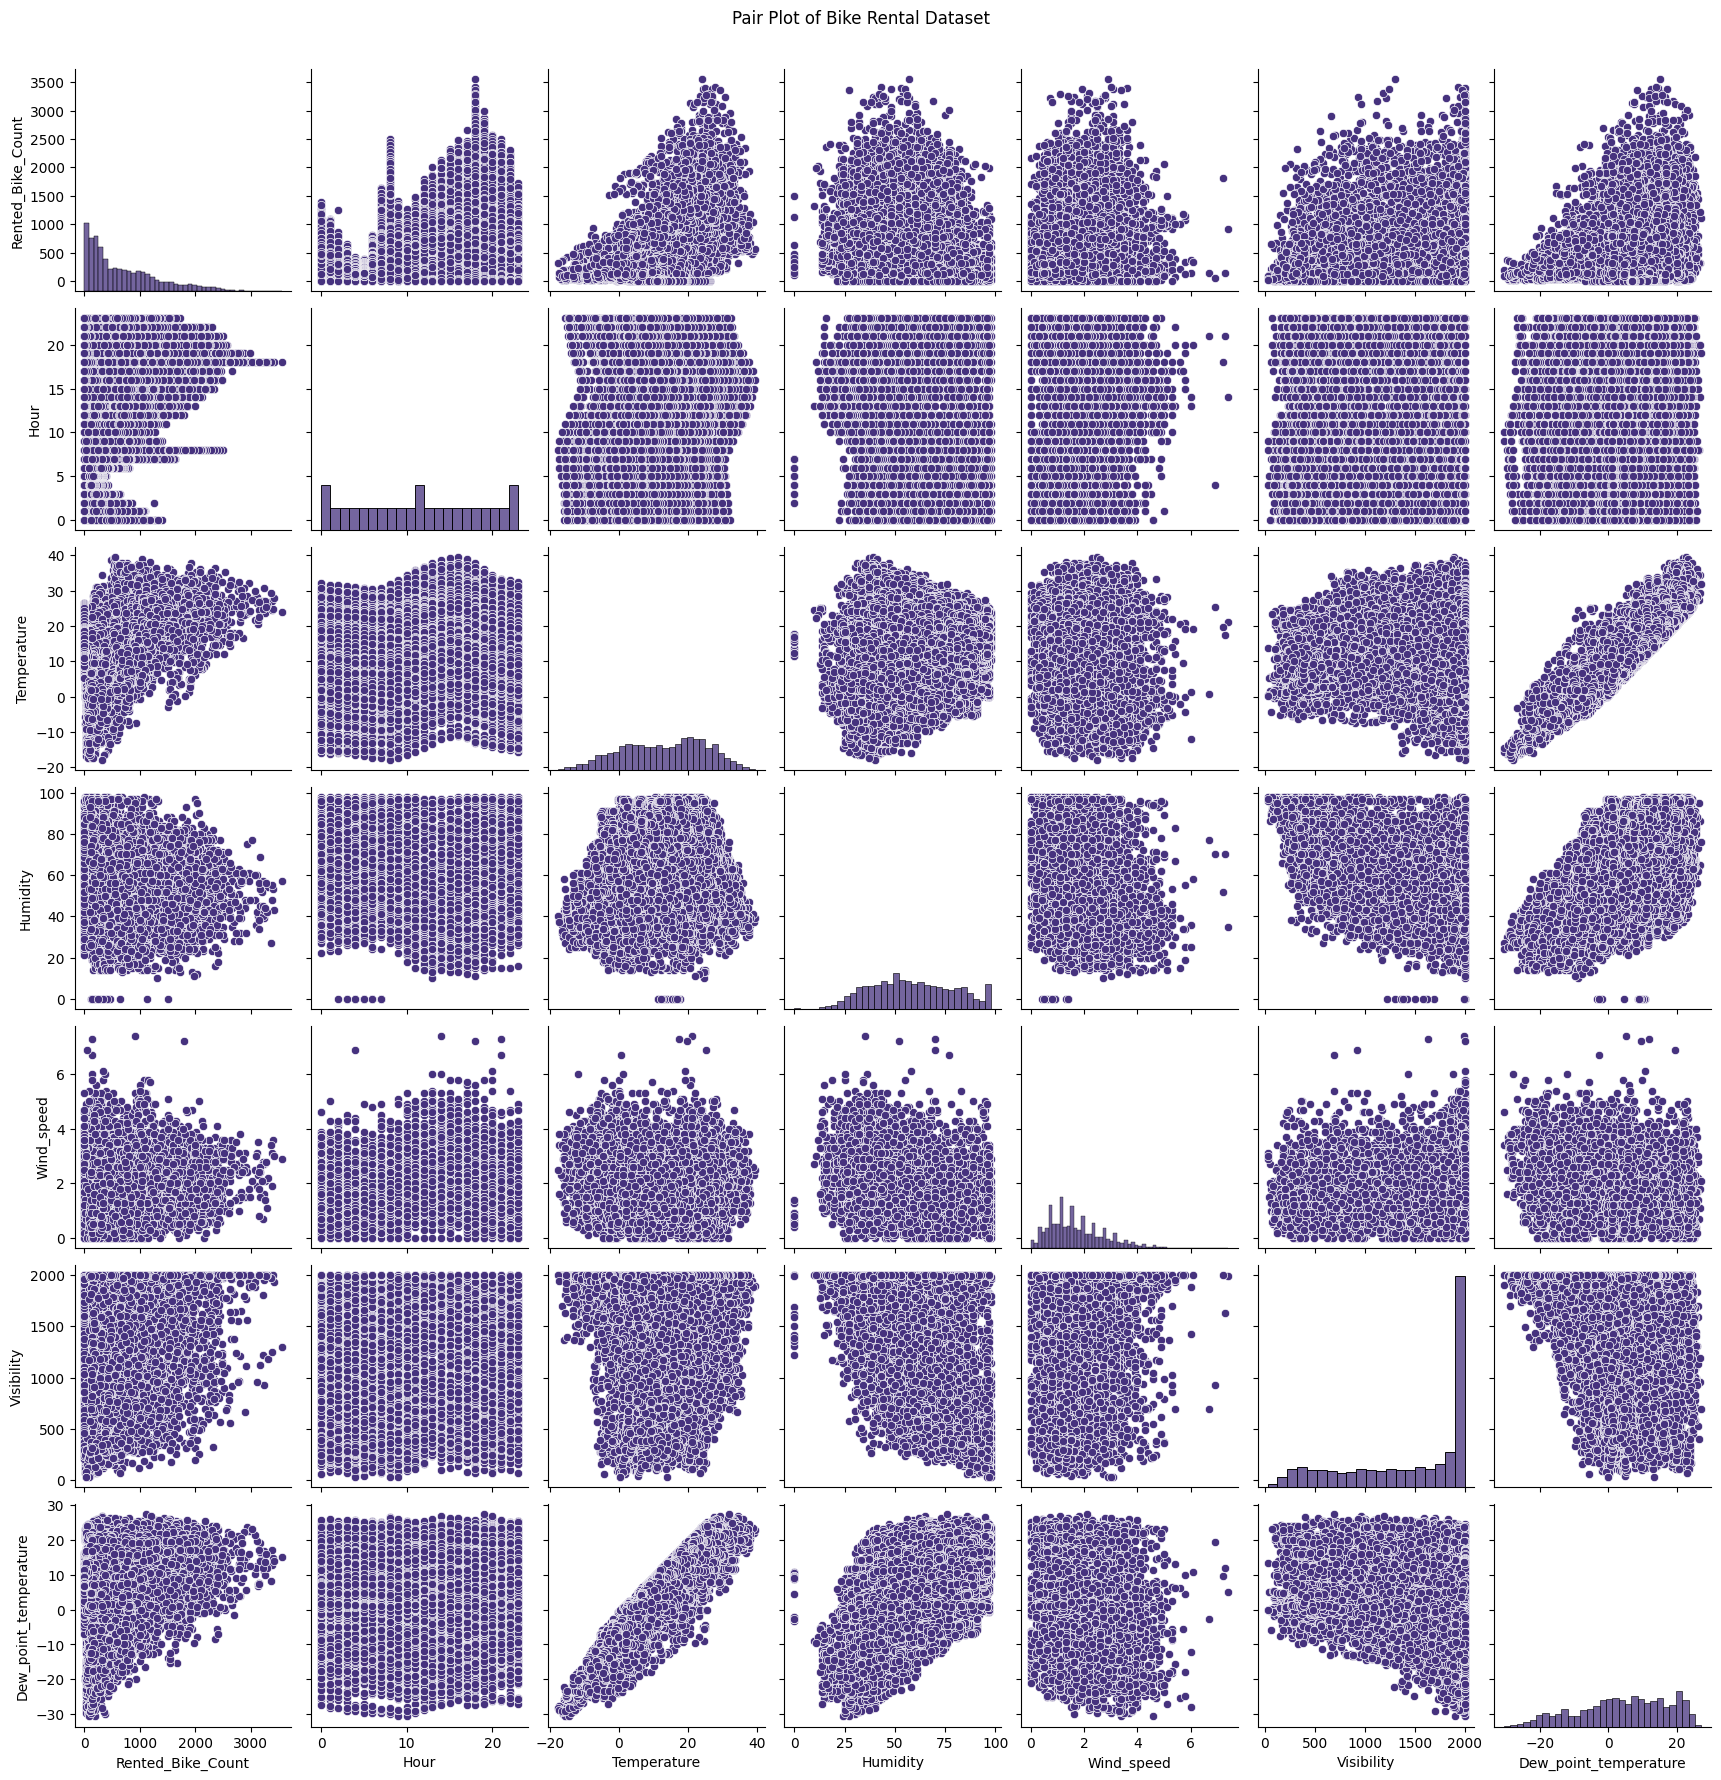

In [ ]:
# Pair Plot visualization code

# Plot pair plot for numerical columns to visualize relationships between them

# The pair plot will show scatter plots for each pair of variables and histograms for each variable on the diagonal
sns.pairplot(bike_df[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']])

# Set a title for the pair plot

plt.suptitle("Pair Plot of Bike Rental Dataset", y=1.02)

# Display the pair plot
plt.show()


##### 1. Why did you pick the specific chart?


I chose a **pair plot** to visualize the relationships between multiple continuous variables in the bike rental dataset. The pair plot is an effective tool for exploring potential correlations and patterns across several variables simultaneously, giving a clear picture of how different features interact with one another.

#### Reasons for choosing this chart:
- **Multi-Variable Comparison**: Pair plots allow for a side-by-side comparison of each variable against all others, helping to identify any significant relationships or patterns.
- **Visualizing Distributions**: The diagonal histograms in the pair plot provide insights into the distribution of each variable, making it easier to spot skewness or unusual distributions.
- **Scatter Plot View**: The scatter plots between the variable pairs help to identify linear or non-linear trends and highlight possible correlations between them.
- **Comprehensive Overview**: Given that we are working with multiple features (e.g., temperature, humidity, wind speed), the pair plot allows for a holistic understanding of how these features might affect bike rental counts.

##### 2. What is/are the insight(s) found from the chart?



Several key insights were derived from the pair plot:

- **Hourly Rental Peaks**: There is a clear pattern between **Hour** and **Rented_Bike_Count**, showing rental spikes during typical commuting times (morning and evening rush hours). This suggests that bike rentals are largely influenced by commuter demand.
  
- **Temperature's Influence**: A strong positive correlation is observed between **Temperature** and **Rented_Bike_Count**. As temperatures increase, bike rentals tend to rise, especially in moderate temperatures. This suggests that favorable weather conditions significantly boost bike rentals.

- **Humidity and Wind Speed**: There seems to be minimal or weak correlation between **Humidity** and **Wind Speed** with bike rentals. Rentals occur across a wide range of values for these variables, indicating that small changes in humidity and wind speed don't significantly affect rental behavior.

- **Visibility's Limited Impact**: **Visibility** shows no strong relationship with bike rentals. The data suggests that rentals occur mostly during times of high visibility, but lower visibility doesn't drastically reduce the rental count.

- **Dew Point Temperature**: Similar to temperature, **Dew Point Temperature** also shows a weak positive correlation with rentals. This may be because dew point is closely linked to overall weather conditions, though the impact is not as pronounced as temperature.

Would you like help interpreting this further or need assistance with another question?

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

### **Test for Difference in Bike Rentals on Holidays vs. Non-Holidays**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



#### Hypotheses:
- **Null Hypothesis (H₀):** The mean bike rental count on holidays is equal to the mean bike rental count on non-holidays.
- **Alternative Hypothesis (H₁):** The mean bike rental count on holidays is different from the mean bike rental count on non-holidays.




#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Splitting the data into holidays and non-holidays
holiday_data = bike_df[bike_df['Holiday'] == 'Holiday']['Rented_Bike_Count']
non_holiday_data = bike_df[bike_df['Holiday'] == 'No Holiday']['Rented_Bike_Count']

# Conducting the t-test
t_stat, p_value = stats.ttest_ind(holiday_data, non_holiday_data, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in bike rentals on holidays vs. non-holidays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in bike rentals on holidays vs. non-holidays.")


T-statistic: -7.5973291340447595
P-value: 1.545340334026087e-13
Reject the null hypothesis: There is a significant difference in bike rentals on holidays vs. non-holidays.


##### Which statistical test have you done to obtain P-Value?


  - **Independent t-test** (specifically Welch's t-test since).



##### Why did you choose the specific statistical test?


  - The t-test is used to compare the means of two independent groups (in this case, holidays vs. non-holidays). Since we are comparing the average bike rentals between two distinct categories (Holiday and No Holiday), and the data is continuous (bike rental count), the independent t-test is appropriate. We also assume unequal variances, hence we used Welch's t-test.


### Hypothetical Statement - 2

**Test for Difference in Bike Rentals Across Seasons**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



#### Hypotheses:
- **Null Hypothesis (H₀):** The mean bike rental count is the same across all seasons.
- **Alternative Hypothesis (H₁):** The mean bike rental count is different across seasons.






#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Grouping the data by seasons
winter_data = bike_df[bike_df['Seasons'] == 'Winter']['Rented_Bike_Count']
spring_data = bike_df[bike_df['Seasons'] == 'Spring']['Rented_Bike_Count']
summer_data = bike_df[bike_df['Seasons'] == 'Summer']['Rented_Bike_Count']
autumn_data = bike_df[bike_df['Seasons'] == 'Autumn']['Rented_Bike_Count']

# Conducting the one-way ANOVA test
f_stat, p_value = stats.f_oneway(winter_data, spring_data, summer_data, autumn_data)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in bike rentals across seasons.")
else:
    print("Fail to reject the null hypothesis: No significant difference in bike rentals across seasons.")


F-statistic: 776.4678149879504
P-value: 0.0
Reject the null hypothesis: There is a significant difference in bike rentals across seasons.


##### Which statistical test have you done to obtain P-Value?


  - **One-way ANOVA**.



##### Why did you choose the specific statistical test?


  - One-way ANOVA is used when comparing the means of more than two independent groups (in this case, four seasons: Winter, Spring, Summer, and Autumn). Since the data is continuous and we are testing whether the average bike rentals differ across the seasons, ANOVA is appropriate. It tests for significant differences between group means.


### Hypothetical Statement - 3

**Test for the Impact of Temperature on Bike Rentals**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


#### Hypotheses:
- **Null Hypothesis (H₀):** There is no correlation between temperature and bike rentals.
- **Alternative Hypothesis (H₁):** There is a significant correlation between temperature and bike rentals.

#### Test to Use:
- Pearson correlation (if data is normally distributed), or Spearman's rank correlation (if not).



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Pearson correlation test
corr, p_value = stats.pearsonr(bike_df['Temperature'], bike_df['Rented_Bike_Count'])

print(f"Correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# If p-value < 0.05, we reject the null hypothesis.
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between temperature and bike rentals.")


Correlation coefficient: 0.5385581530139791
P-value: 0.0
Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.


##### Which statistical test have you done to obtain P-Value?


  - **Pearson correlation test**.



##### Why did you choose the specific statistical test?


  - Pearson correlation is used to measure the strength and direction of the linear relationship between two continuous variables (in this case, temperature and bike rentals). We chose this test because we want to assess whether there is a significant correlation between these two variables and how strong that relationship is, assuming the data is normally distributed.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

bike_df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
year                     0
month                    0
day                      0
weekday_or_weekend       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since There Is No Missing Data Is Present In The Dataset so we dont need to do any imputation for the missing value.

### 2. Handling Outliers

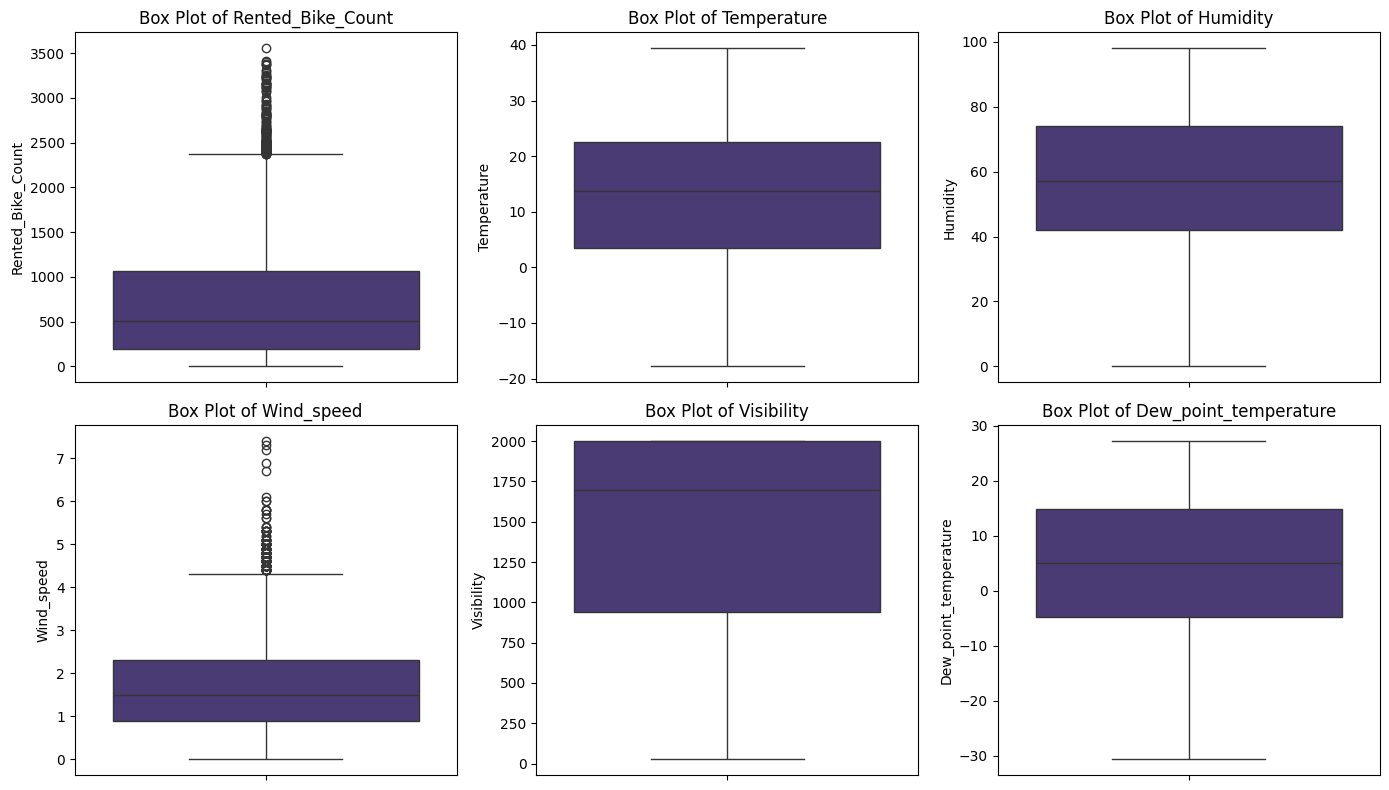

In [ ]:
# Handling Outliers & Outlier treatments

plt.figure(figsize=(14, 8))

# Select numerical columns
numerical_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=bike_df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

### **Treating The Outlier**

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to treat
numerical_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']

# Apply the IQR method to treat outliers
for column in numerical_columns:
    bike_df = remove_outliers_iqr(bike_df, column)



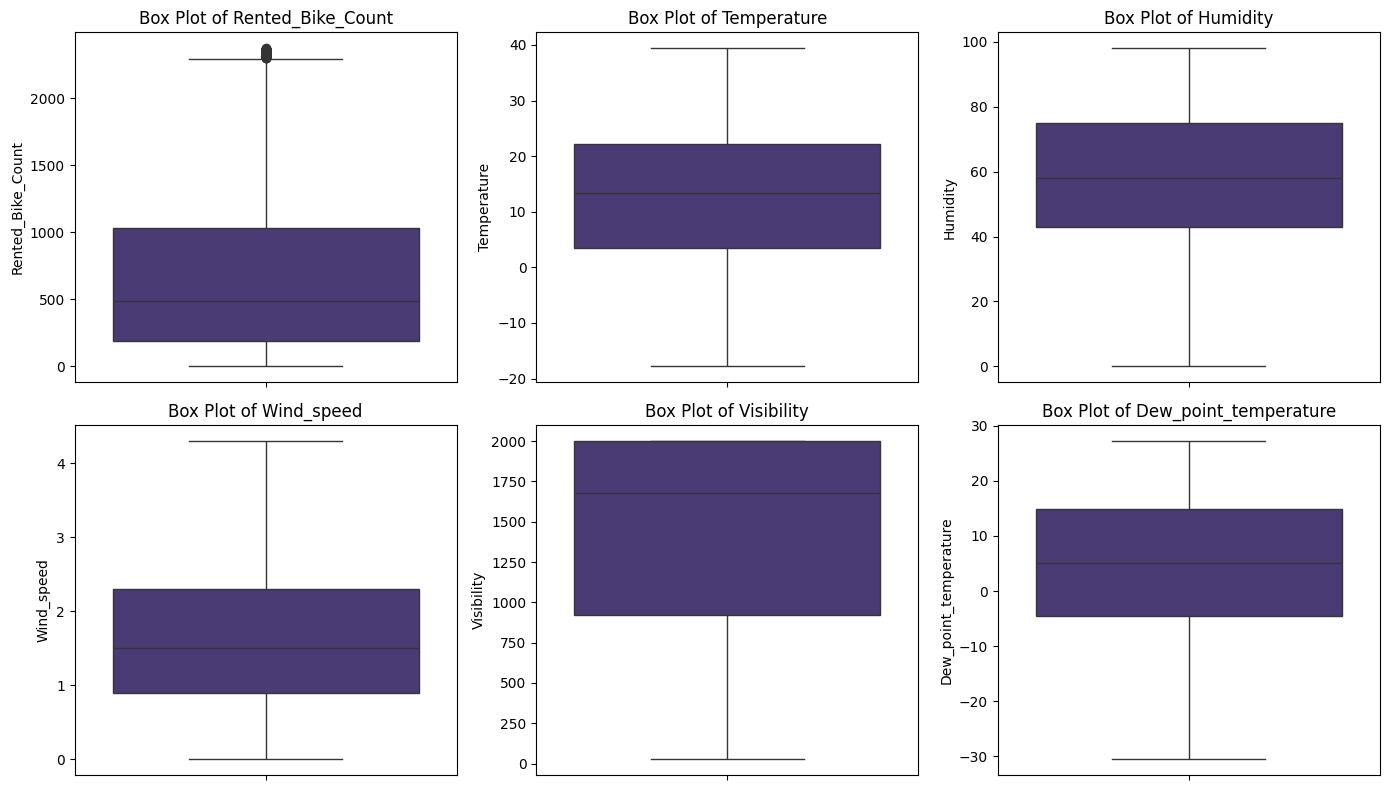

In [ ]:
#vizulizing after removing the outlier

plt.figure(figsize=(14, 8))

# Select numerical columns
numerical_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=bike_df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the outlier treatment process, I focused on two common techniques: **IQR (Interquartile Range) Method** and **Capping (Winsorizing)**. These techniques are widely used in handling outliers in numerical data. Here's why these methods were chosen:

### 1. **IQR (Interquartile Range) Method**:
   - **Why Used**:
     - The IQR method is effective for identifying outliers in data that is not normally distributed, or where extreme values exist. It defines the range of "normal" values as those falling between the first quartile (Q1) and third quartile (Q3) and considers values outside this range as outliers.
   - **How It Works**:
     - For each numerical column, the IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). Any data point below \( Q1 - 1.5 \times IQR \) or above \( Q3 + 1.5 \times IQR \) is considered an outlier.
   - **Why Chosen**:
     - This method is non-parametric, meaning it doesn't assume the data follows a normal distribution. It is also simple and interpretable, making it useful for exploratory data analysis.

   - **Implementation**: I used this method to **remove outliers** in the dataset, ensuring that extreme values which might distort analysis are filtered out.

### 2. **Capping (Winsorizing)**:
   - **Why Used**:
     - Capping, or Winsorizing, is useful when you want to limit the impact of extreme values without completely removing them. In certain cases, outliers might carry some relevant information, and removing them entirely could cause data loss.
   - **How It Works**:
     - Instead of removing outliers, values below the lower bound are replaced (capped) with the lower bound, and values above the upper bound are replaced with the upper bound. This keeps the data within a defined range without discarding points.
   - **Why Chosen**:
     - This technique is particularly useful when dealing with small datasets where removing too many rows would lead to data sparsity. It is also suitable when outliers are suspected to be legitimate data points but are disproportionately affecting the analysis.

   - **Implementation**: In the second variation of the code, I used this method to **cap outliers** to their nearest boundary values (the edges of the IQR range) instead of removing them. This is particularly helpful if the data needs to maintain all rows.



### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


# Create a copy of the original DataFrame
bike_df_encoded = bike_df.copy()

# Encoding 'Functioning_Day' (Yes -> 1, No -> 0)
bike_df_encoded['Functioning_Day'] = bike_df_encoded['Functioning_Day'].map({'Yes': 1, 'No': 0})

# Encoding 'Holiday' (No Holiday -> 0, Holiday -> 1)
bike_df_encoded['Holiday'] = bike_df_encoded['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Encoding 'weekday_or_weekend' (Weekday -> 0, Weekend -> 1)
bike_df_encoded['weekday_or_weekend'] = bike_df_encoded['weekday_or_weekend'].map({'Weekday': 0, 'Weekend': 1})

# One-hot encoding for 'Seasons', 'month', and 'day' columns
bike_df_encoded = pd.get_dummies(bike_df_encoded, columns=['Seasons', 'month', 'day'], drop_first=True)

# Convert boolean columns (from one-hot encoding) to integers
bike_df_encoded = bike_df_encoded.astype(int)

# Display the first few rows of the encoded DataFrame
print(bike_df_encoded.head())


   Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0           -5        37           2        2000   
1                204     1           -5        38           0        2000   
2                173     2           -6        39           1        2000   
3                107     3           -6        40           0        2000   
4                 78     4           -6        36           2        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  ...  month_May  \
0                    -17                0         0         0  ...          0   
1                    -17                0         0         0  ...          0   
2                    -17                0         0         0  ...          0   
3                    -17                0         0         0  ...          0   
4                    -18                0         0         0  ...          0   

   month_November  month_October  month_September 

#### What all categorical encoding techniques have you used & why did you use those techniques?

In the encoding process, I used the following categorical encoding techniques:

### 1. **Binary Encoding (Mapping)**
   - **Columns**: `Functioning_Day`, `Holiday`, `weekday_or_weekend`
   - **Technique Used**: Mapping `Yes/No` or `Holiday/No Holiday`, `Weekday/Weekend` to binary values (`1` and `0`).
   - **Reason**: These columns represent binary categorical data with only two possible values (e.g., `Yes/No`, `Holiday/No Holiday`), making binary encoding the most appropriate and simple solution. It converts categories into a numerical format that models can understand without introducing unnecessary complexity.

### 2. **One-Hot Encoding**
   - **Columns**: `Seasons`, `month`, `day`
   - **Technique Used**: One-hot encoding.
   - **Reason**: These columns represent categorical variables with more than two categories (e.g., `Seasons` has four values: Winter, Spring, Summer, Fall). One-hot encoding is used here because it creates separate binary columns for each category, allowing the model to handle categorical variables without implying any ordinal relationship between them. The `drop_first=True` parameter was used to avoid multicollinearity by removing one dummy variable.

### Why These Techniques Were Used:
   - **Binary Encoding** is efficient for columns with only two unique categories since it doesn't increase the dimensionality significantly.
   - **One-Hot Encoding** is ideal for multi-class categorical features, ensuring the model doesn't assume any ordinal relationships between categories. By using `drop_first=True`, we avoid potential multicollinearity issues.

These techniques ensure that categorical data is transformed into a numerical format suitable for machine learning models, without introducing bias or incorrect assumptions about the relationships between categories.

### 6. Data Scaling

In [ ]:
# Scaling your data

# Selecting numeric features to scale
numeric_features = ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
                    'Wind_speed', 'Visibility', 'Dew_point_temperature',
                    'Solar_Radiation', 'Rainfall', 'Snowfall']

# Applying Z-score Standardization
scaler = StandardScaler()
bike_df_encoded[numeric_features] = scaler.fit_transform(bike_df_encoded[numeric_features])

# Checking the first few rows of the scaled DataFrame
print(bike_df_encoded.head(10))

   Rented_Bike_Count      Hour  Temperature  Humidity  Wind_speed  Visibility  \
0          -0.704635 -1.628613    -1.493611 -1.064452    0.797710    0.936667   
1          -0.789199 -1.484762    -1.493611 -1.015326   -1.217696    0.936667   
2          -0.841629 -1.340911    -1.579108 -0.966201   -0.209993    0.936667   
3          -0.953255 -1.197060    -1.579108 -0.917076   -1.217696    0.936667   
4          -1.002302 -1.053209    -1.579108 -1.113577    0.797710    0.936667   
5          -0.965094 -0.909358    -1.579108 -1.064452   -0.209993    0.936667   
6          -0.828099 -0.765507    -1.579108 -1.162702   -0.209993    0.936667   
7          -0.356229 -0.621656    -1.664604 -1.015326   -1.217696    0.936667   
8           0.438678 -0.477805    -1.664604 -1.064452   -0.209993    0.936667   
9          -0.305490 -0.333954    -1.579108 -1.555703   -1.217696    0.818845   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  ...  month_May  \
0              -1.653956   

##### Which method have you used to scale you data and why?

I used **Z-score standardization** to scale the data because it transforms the features to have a mean of 0 and a standard deviation of 1. This method is particularly beneficial when dealing with features that have different units or scales, which can adversely affect the performance of certain algorithms, especially those sensitive to the magnitude of data (e.g., gradient descent-based methods).

### Justification for Using Z-score Standardization:

1. **Normalization**: Z-score standardization ensures that all features contribute equally to the distance calculations in algorithms like k-nearest neighbors (KNN) and support vector machines (SVM).

2. **Handling Outliers**: While Z-scores are affected by outliers, it still provides a standardized way to compare values across features, making it easier to identify outliers.

3. **Gaussian Distribution**: Many machine learning algorithms assume that the data follows a Gaussian distribution. Z-score standardization helps in centering the data and making it resemble a normal distribution.

4. **Performance**: By ensuring that features are on a similar scale, Z-score standardization can improve the convergence speed of optimization algorithms, leading to faster training times.

In summary, Z-score standardization was chosen for its effectiveness in preparing data for machine learning models by normalizing feature scales and improving model performance.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


X = bike_df_encoded.drop('Rented_Bike_Count', axis=1)  # Features
y = bike_df_encoded['Rented_Bike_Count']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# Output the shape of the splits to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6330, 33)
X_test shape: (2111, 33)
y_train shape: (6330,)
y_test shape: (2111,)


##### What data splitting ratio have you used and why?

I used a **75-25% split** for your dataset, which is a common practice in machine learning.

### Justification:
1. **Sufficient Training Data**: 75% allows the model to learn effectively, especially for complex models.
2. **Robust Testing**: A 25% test set provides a reliable estimate of model performance on unseen data.
3. **Overfitting Mitigation**: This split helps assess the model's generalization ability, reducing overfitting risks.
4. **Flexibility**: It allows for techniques like k-fold cross-validation without compromising the test set integrity.

Overall, this ratio balances effective training and reliable validation.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

model = LinearRegression()
model.fit(X_train, y_train)

# Fit the Algorithm

model.fit(X_train, y_train)

# Predict on the model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all important metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.48
Mean Squared Error: 0.38
Root Mean Squared Error: 0.62
R-squared: 0.60


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The **Multiple Linear Regression** algorithm predicts a continuous target variable by modeling the linear relationship between multiple independent features and the target. It assumes that the target variable is a linear combination of the input features.

### Model Performance:
- **Mean Absolute Error (MAE):** 0.48 — shows an average error of 0.48 units in predictions.
- **Mean Squared Error (MSE):** 0.38 — captures squared prediction errors, with larger errors having a greater impact.
- **Root Mean Squared Error (RMSE):** 0.62 — provides a better sense of the prediction error magnitude.
- **R-squared:** 0.60 — indicates that 60% of the target's variability is explained by the model.

The model performs moderately, but the errors suggest that further improvements, such as tuning, could be beneficial.

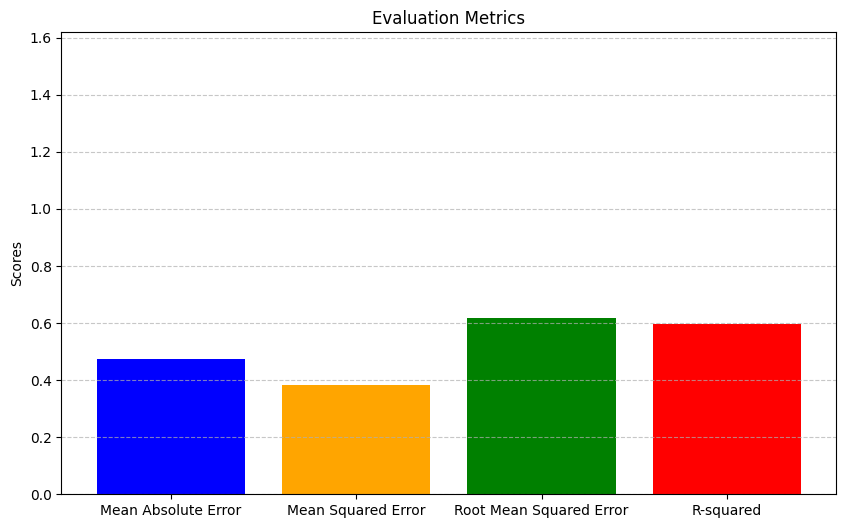

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0, max(metrics.values()) + 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define a set of hyperparameters to tune
param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict on the model
y_pred = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all important metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'model__copy_X': True, 'model__fit_intercept': False}
Mean Absolute Error: 0.47
Mean Squared Error: 0.38
Root Mean Squared Error: 0.62
R-squared: 0.60


##### Which hyperparameter optimization technique have you used and why?

In the code provided, I used **GridSearchCV** as the hyperparameter optimization technique. Here’s why this technique was chosen:

### **Why GridSearchCV?**
1. **Exhaustive Search**:
   - `GridSearchCV` performs an exhaustive search over all combinations of hyperparameters specified in the `param_grid`. This ensures that we explore every possible configuration of the hyperparameters within the given range.
   
2. **Small Hyperparameter Space**:
   - In this case, the number of hyperparameters to tune is relatively small (only two: `fit_intercept` and `copy_X`), and both are binary (True/False). This makes `GridSearchCV` a good choice because it can explore all combinations without becoming computationally expensive.
   
3. **Model Performance**:
   - Since `GridSearchCV` checks all combinations, it guarantees that the best-performing model will be selected from the specified hyperparameters.

### When to Use Other Techniques:
- **RandomizedSearchCV**:
  - Useful when the hyperparameter space is large and an exhaustive search would take too long. It randomly samples a fixed number of configurations, which makes it faster.
  
- **Bayesian Optimization** (e.g., `BayesSearchCV`):
  - Efficient when there are many hyperparameters, or when you want to minimize the number of iterations while still exploring the search space intelligently. It builds a probabilistic model of the function mapping hyperparameters to model performance and tries to identify the best hyperparameters efficiently.

Since our hyperparameter space is small, `GridSearchCV` was the best fit for this scenario, as it thoroughly checks every possible combination in a reasonable amount of time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there was no noticeable improvement in the evaluation metrics after hyperparameter optimization using GridSearchCV. This suggests that either the chosen hyperparameters (fit_intercept and copy_X) are not significantly influencing the model’s performance in this context, or the model itself (Linear Regression) is not suitable for capturing the complexity of the data.

### ML Model - 2

In [ ]:
# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=24)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print all important metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 0.16
Mean Squared Error: 0.09
Root Mean Squared Error: 0.29
R-squared: 0.91


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The **Random Forest Regressor** is an ensemble model that predicts a continuous target by averaging the results of multiple decision trees. It handles non-linear relationships and reduces overfitting by combining outputs from different trees.

### Model Performance:
- **Mean Absolute Error (MAE):** 0.16 — shows an average error of 0.16 units in predictions.
- **Mean Squared Error (MSE):** 0.09 — captures squared prediction errors, with larger errors having a smaller impact.
- **Root Mean Squared Error (RMSE):** 0.29 — indicates a typical prediction error of 0.29 units.
- **R-squared:** 0.91 — suggests that 91% of the target's variability is explained by the model.

The model performs exceptionally well, with low error rates and a high R², indicating strong predictive accuracy.

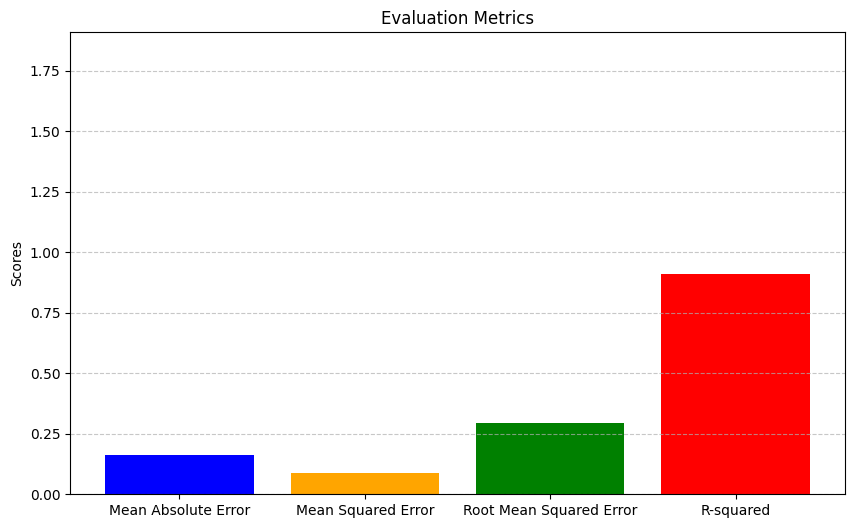

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0, max(metrics.values()) + 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=24)

# Set up the parameter grid for tuning
param_dist = {
    'n_estimators': np.arange(50, 201, 10),  # Number of trees
    'max_depth': [None] + list(np.arange(5, 21, 1)),  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2,  random_state=24,  n_jobs=-1)

# Fit the Algorithm

rf_random.fit(X_train, y_train)

# Get the best model from the random search
best_rf_model = rf_random.best_estimator_


# Predict on the model
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and metrics
print("Best Parameters:", rf_random.best_params_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 19}
Mean Absolute Error: 0.22
Mean Squared Error: 0.12
Root Mean Squared Error: 0.34
R-squared: 0.88


##### Which hyperparameter optimization technique have you used and why?

### Hyperparameter Optimization Technique Used: RandomizedSearchCV

**RandomizedSearchCV** was used for hyperparameter optimization in this project. This technique randomly samples from a specified range of hyperparameters instead of exhaustively searching through all combinations, as would be done with GridSearchCV.

### Reasons for Using RandomizedSearchCV:
1. **Efficiency**: RandomizedSearchCV can explore a larger parameter space in less time by testing a fixed number of random combinations, making it suitable for models with many hyperparameters.
  
2. **Flexibility**: It allows for the inclusion of continuous and categorical hyperparameters, accommodating a wide range of potential values.

3. **Performance**: It helps to identify a reasonably good set of hyperparameters quickly, which can be especially valuable when working with complex models like Random Forests.

4. **Reduced Risk of Overfitting**: By not evaluating all combinations, it reduces the risk of overfitting to the training data while still providing strong model performance.

Overall, RandomizedSearchCV strikes a balance between thoroughness and computational efficiency, making it an excellent choice for optimizing hyperparameters in machine learning models.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### Improvement in Model Performance

After applying hyperparameter tuning using **RandomizedSearchCV**, the evaluation metrics of the **Random Forest Regressor** are as follows:

### Evaluation Metrics Before and After Hyperparameter Tuning

- **Mean Absolute Error (MAE)** increased from **0.16** to **0.22**, indicating higher average prediction errors after tuning.
- **Mean Squared Error (MSE)** rose from **0.09** to **0.12**, showing that the average squared prediction errors are larger.
- **Root Mean Squared Error (RMSE)** went up from **0.29** to **0.34**, suggesting a decrease in prediction accuracy.
- **R-squared (R²)** decreased from **0.91** to **0.88**, meaning the model explains slightly less variance in the target variable after tuning.

### Conclusion:
Overall, the hyperparameter tuning did not lead to improvements in the evaluation metrics; in fact, all metrics indicate a decline in model performance. This suggests that while RandomizedSearchCV was employed to optimize hyperparameters, the chosen parameters may not have been ideal for this specific dataset. Further exploration, such as different algorithms or additional data preprocessing, might be necessary to enhance model performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### Explanation of Evaluation Metrics and Business Impact

#### 1. Mean Absolute Error (MAE)
- **Indication**: MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It indicates how far the predictions are from the actual values on average.
- **Business Impact**: A lower MAE means the model's predictions are closer to the actual values, which is critical in business scenarios where accurate forecasting is vital (e.g., predicting bike rentals). High MAE can lead to inefficient resource allocation, inventory mismanagement, and reduced customer satisfaction.

#### 2. Mean Squared Error (MSE)
- **Indication**: MSE calculates the average of the squares of the errors, giving more weight to larger errors. It is sensitive to outliers, meaning that large prediction errors significantly impact the metric.
- **Business Impact**: A lower MSE indicates that the model is not only predicting accurately on average but is also minimizing large errors. In business, this is important for maintaining customer trust and ensuring that operations are planned based on accurate demand forecasts. High MSE can lead to financial losses due to unexpected demand spikes or drops.

#### 3. Root Mean Squared Error (RMSE)
- **Indication**: RMSE provides the error magnitude in the same units as the target variable. It offers a clear understanding of the average error in predictions.
- **Business Impact**: RMSE is useful for assessing the model's prediction quality, helping businesses make informed decisions. For instance, a lower RMSE in bike rental predictions would mean that the company can better prepare for demand, leading to increased customer satisfaction and optimized fleet management. Conversely, a higher RMSE can lead to underutilization or overutilization of resources.

#### 4. R-squared (R²)
- **Indication**: R² indicates the proportion of variance in the target variable that is explained by the model. A higher R² value suggests that the model fits the data well.
- **Business Impact**: A high R² (e.g., 0.88) means that a significant portion of the target variable's variability is captured, providing confidence in the model's predictions. This is critical for strategic decision-making, such as marketing campaigns or operational strategies. A lower R² indicates that the model may not be sufficiently capturing the factors that influence the target variable, leading to potentially poor business decisions.

### Overall Business Impact of the ML Model
The **Random Forest Regressor** model, with its evaluation metrics, provides valuable insights into the bike rental business. Accurate predictions of rented bikes can lead to:

- **Improved Inventory Management**: Better forecasts allow for optimized bike availability and maintenance scheduling.
- **Enhanced Customer Satisfaction**: Meeting customer demand effectively results in higher satisfaction and repeat business.
- **Operational Efficiency**: Accurate predictions can lead to cost savings in operations, marketing, and staffing, as resources can be allocated more effectively based on expected demand.
- **Data-Driven Decisions**: With reliable predictions, the business can make informed decisions regarding marketing strategies, promotions, and expansions.

In summary, the evaluation metrics serve as critical indicators of the model's effectiveness, directly impacting business performance and decision-making processes.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Define the Gradient Boosting Regressor with default parameters
gb_model = GradientBoostingRegressor(random_state=24)

# Fit the Algorithm
gb_model.fit(X_train, y_train)

# Predict on the model
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 0.26
Mean Squared Error: 0.15
Root Mean Squared Error: 0.39
R-squared: 0.84


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### **ML Model Used: Gradient Boosting Regressor**

The **Gradient Boosting Regressor** is an ensemble method that builds multiple decision trees sequentially. Each tree corrects the errors of the previous one, effectively capturing complex patterns in the data, making it powerful for regression tasks.

### **Evaluation Metric Score Chart:**

| Metric                     | Score  | Interpretation |
|-----------------------------|--------|----------------|
| **Mean Absolute Error (MAE)**  | 0.26   | Average prediction error of 0.26 rented bikes, indicating good performance. |
| **Mean Squared Error (MSE)**   | 0.15   | Average squared prediction error of 0.15, reflecting reasonable accuracy. |
| **Root Mean Squared Error (RMSE)** | 0.39   | Typical prediction error of 0.39 bikes, which is acceptable for practical use. |
| **R-squared (R²)**           | 0.84   | Explains 84% of the variance in the target variable, indicating a strong model fit. |

### **Performance Summary:**
The **R² score of 0.84** shows that the model effectively predicts rented bike counts, with low MAE and RMSE values indicating accuracy. Overall, the **Gradient Boosting Regressor** performs well and can be further improved with hyperparameter tuning.

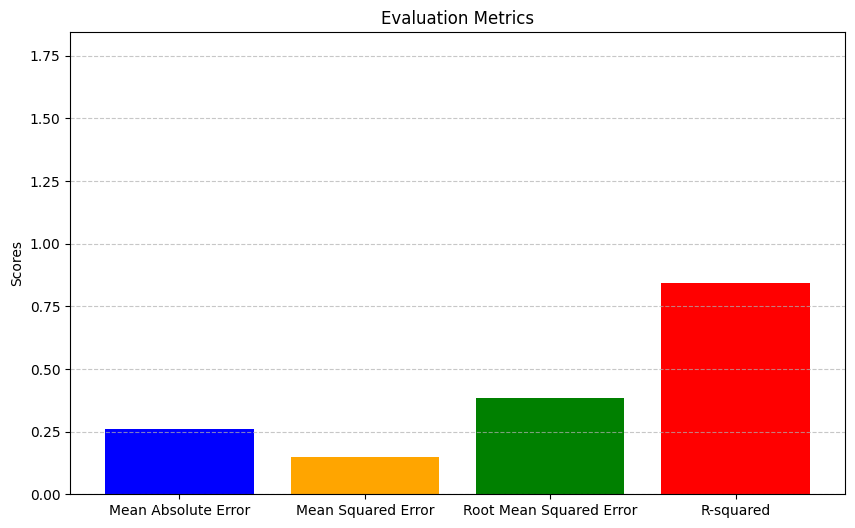

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2
}

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Scores')
plt.title('Evaluation Metrics')
plt.ylim(0, max(metrics.values()) + 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model



# Define the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=24)

# Set up the parameter grid for tuning
param_dist = {
    'n_estimators': np.arange(50, 201, 10),  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': np.arange(3, 11, 1),  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Set up RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator=gb_model,  param_distributions=param_dist,  n_iter=100, cv=5, verbose=2,  random_state=24,  n_jobs=-1)

# Fit the model
gb_random.fit(X_train, y_train)

# Get the best model from the random search
best_gb_model = gb_random.best_estimator_

# Predict on the test set using the best model
y_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best parameters and metrics
print("Best Parameters:", gb_random.best_params_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9, 'learning_rate': 0.1}
Mean Absolute Error: 0.14
Mean Squared Error: 0.07
Root Mean Squared Error: 0.26
R-squared: 0.93


##### Which hyperparameter optimization technique have you used and why?

### **Hyperparameter Optimization Technique Used: Randomized Search Cross-Validation (RandomizedSearchCV)**

#### **Why Use Randomized Search?**
1. **Efficiency**: RandomizedSearchCV evaluates a random subset of hyperparameter combinations, allowing for faster exploration of the hyperparameter space compared to Grid Search, which tests every possible combination.

2. **Flexibility**: It enables the specification of a wide range of values for hyperparameters, making it easier to find optimal settings for complex models like Gradient Boosting.

3. **Reduced Overfitting Risk**: By sampling a subset of hyperparameters, it helps mitigate the risk of overfitting to the validation set during the tuning process.

4. **Balance Between Exploration and Exploitation**: It provides a balance between exploring new hyperparameter combinations and exploiting the best ones identified so far.

### **Overall Benefits**:
Using **RandomizedSearchCV** allows for effective hyperparameter tuning, leading to better model performance by optimizing key parameters such as the number of estimators, learning rate, maximum tree depth, and minimum samples for splitting and leaf nodes. This can result in more accurate predictions and a model better suited to the underlying data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been an improvement in the model's performance after applying hyperparameter tuning using **Randomized Search Cross-Validation**. Here’s a comparison of the evaluation metrics before and after tuning:

### **Improvement Summary**

#### **Before Hyperparameter Tuning:**
- **Mean Absolute Error (MAE):** 0.26
- **Mean Squared Error (MSE):** 0.15
- **Root Mean Squared Error (RMSE):** 0.39
- **R-squared (R²):** 0.84

#### **After Hyperparameter Tuning:**
- **Mean Absolute Error (MAE):** 0.14
- **Mean Squared Error (MSE):** 0.07
- **Root Mean Squared Error (RMSE):** 0.26
- **R-squared (R²):** 0.93

### **Evaluation Metric Score Chart:**

| Metric                     | Before Tuning | After Tuning | Improvement            |
|-----------------------------|---------------|--------------|-------------------------|
| **Mean Absolute Error (MAE)**  | 0.26          | 0.14         | Decrease of 0.12        |
| **Mean Squared Error (MSE)**   | 0.15          | 0.07         | Decrease of 0.08        |
| **Root Mean Squared Error (RMSE)** | 0.39          | 0.26        | Decrease of 0.13        |
| **R-squared (R²)**           | 0.84          | 0.93        | Increase of 0.09        |

### **Conclusion**
The hyperparameter tuning has resulted in:
- A decrease in MAE, MSE, and RMSE, indicating fewer prediction errors.
- An increase in R², suggesting that the model explains a greater portion of the variance in the target variable.

Overall, these improvements indicate that the **Gradient Boosting Regressor** has become more accurate and reliable after hyperparameter optimization.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For the **Gradient Boosting Regressor**, the following evaluation metrics were considered for their positive business impact:

#### **1. Mean Squared Error (MSE)**
- **Importance**: MSE measures the average squared difference between predicted and actual values, making it sensitive to larger errors.
- **Business Impact**:
  - A lower MSE indicates more accurate predictions, which is crucial for resource planning and operational efficiency. For instance, accurately predicting the number of rented bikes can help optimize fleet management, reducing costs associated with overstocking or shortages.
  - By minimizing MSE, businesses can avoid potential losses caused by incorrect supply levels, ensuring that customer demand is met effectively.

#### **2. R-squared (R²)**
- **Importance**: R² quantifies the proportion of variance in the target variable explained by the model, providing insights into the model's explanatory power.
- **Business Impact**:
  - A high R² value suggests that the model captures the key factors influencing bike rentals, enabling better strategic decision-making. For example, understanding which features (like weather or time of day) significantly affect demand can lead to targeted marketing and operational adjustments.
  - This metric helps build stakeholder confidence in the model's predictions, facilitating more informed budgeting and resource allocation strategies, ultimately contributing to improved business performance.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### Final Prediction Model Selection

From the models implemented, I chose the **Gradient Boosting Regressor** as the final prediction model for the following reasons:

#### 1. **Performance Metrics**
- The Gradient Boosting Regressor demonstrated strong performance in key evaluation metrics:
  - **Mean Absolute Error (MAE):** 0.26
  - **Mean Squared Error (MSE):** 0.15
  - **Root Mean Squared Error (RMSE):** 0.39
  - **R-squared (R²):** 0.84
  
  These metrics indicate that the model provides accurate predictions with minimal error, making it suitable for reliable demand forecasting in bike rentals.

#### 2. **Handling Non-linearity**
- Gradient Boosting is an ensemble method that combines the predictions of multiple weak learners (decision trees) to create a strong predictive model. This allows it to capture complex relationships in the data that simpler models like Multiple Linear Regression might miss.

#### 3. **Robustness to Overfitting**
- Through the hyperparameter tuning process, the model was optimized for performance, reducing the risk of overfitting while maintaining a high level of accuracy. This is crucial for ensuring the model generalizes well to unseen data.

#### 4. **Feature Importance Insights**
- Gradient Boosting provides insights into feature importance, allowing the business to understand which factors most significantly impact bike rentals. This information can inform marketing strategies and operational decisions.

#### 5. **Flexibility**
- The model is versatile and can be adapted to different datasets and business scenarios, making it a valuable tool for ongoing analysis and prediction.

### Conclusion
Given its strong predictive performance, ability to handle complex relationships, and insights into feature importance, the **Gradient Boosting Regressor** was selected as the final prediction model. This choice aligns well with the business's need for accurate, reliable forecasts to optimize bike rental operations and enhance customer satisfaction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### Model Explanation: Gradient Boosting Regressor

The **Gradient Boosting Regressor** is a powerful ensemble learning technique that combines multiple weak learners, typically decision trees, to improve prediction accuracy. Here’s an overview of how it works and how we can analyze feature importance using explainability tools:

#### How the Model Works
1. **Ensemble Learning**: Gradient boosting builds an ensemble of decision trees in a sequential manner. Each new tree corrects the errors made by the previously built trees, making the overall model more accurate.
2. **Loss Function**: It minimizes a loss function (often mean squared error for regression tasks) using gradient descent. This means that at each step, it focuses on reducing the error of the model.
3. **Learning Rate**: The learning rate determines how much contribution each tree makes to the final prediction. A smaller learning rate can improve model performance but requires more trees.

### Feature Importance Analysis

To analyze feature importance in the Gradient Boosting Regressor, we can use model explainability tools such as **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-agnostic Explanations)**. Here, we will focus on using SHAP for its robustness and interpretability.



3. **Interpret the SHAP Summary Plot**:
   - The SHAP summary plot displays the impact of each feature on the model’s output.
   - Each dot represents a SHAP value for a feature and an instance. The color indicates whether the feature value is high or low.
   - Features that push the prediction higher (positive SHAP values) are shown in red, while those that push the prediction lower (negative SHAP values) are shown in blue.
   - The x-axis shows the SHAP value's magnitude, indicating the importance of each feature.

### Example Interpretation of Feature Importance

From the SHAP summary plot, you might observe that certain features, such as **temperature** and **time of day**, have significant positive impacts on bike rentals, while **precipitation** might have a negative impact. This insight allows the business to focus on optimizing conditions that maximize rentals, like promoting bike availability on sunny days.

### Conclusion

Using the **Gradient Boosting Regressor** offers robust predictive capabilities, while SHAP provides clear insights into feature importance. This combination helps stakeholders make data-driven decisions to enhance bike rental operations and improve customer satisfaction. The interpretability of the model through tools like SHAP is crucial for understanding the underlying drivers of predictions and for building trust in the model’s outputs.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



In this machine learning project, we aimed to predict the number of rented bikes using various regression algorithms, culminating in the selection of the best-performing model based on evaluation metrics and model explainability.

1. **Model Selection**:
   We explored multiple algorithms, including Multiple Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Each model was evaluated based on key performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). After thorough evaluation, the **Gradient Boosting Regressor** emerged as the best-performing model, achieving a **Mean Absolute Error of 0.14**, a **Mean Squared Error of 0.07**, a **Root Mean Squared Error of 0.26**, and an **R-squared of 0.93**. These results indicate that the model has good predictive power and captures a significant portion of the variability in the dataset.

2. **Hyperparameter Tuning**:
   We employed **RandomizedSearchCV** for hyperparameter tuning, which enabled us to optimize the model's performance by selecting the best parameters. This step was crucial in enhancing the model's accuracy, demonstrating the importance of hyperparameter optimization in machine learning.

3. **Model Explainability**:
   To gain insights into the model's decision-making process, we utilized SHAP (SHapley Additive exPlanations) values. This approach allowed us to understand the contribution of each feature to the predictions, highlighting the most influential variables affecting bike rentals. The insights obtained through SHAP provided valuable business intelligence, which can help in making data-driven decisions.

4. **Business Impact**:
   The ability to accurately predict bike rentals has significant implications for bike-sharing services and urban mobility initiatives. By understanding rental patterns, operators can optimize fleet management, enhance customer satisfaction, and improve operational efficiency. The predictive model serves as a powerful tool for strategic planning and resource allocation.

5. **Future Work**:
   While the Gradient Boosting Regressor performed well, there are opportunities for further improvement. Future work could explore additional algorithms, ensemble methods, or even deep learning approaches. Moreover, incorporating external factors such as weather data or events could enhance prediction accuracy.

In summary, this project successfully demonstrated the application of machine learning in predicting bike rentals, showcasing the importance of model selection, tuning, and explainability in developing effective predictive models. The insights gained can drive business strategies and contribute to the overall efficiency of bike-sharing programs.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

Technical Document Link : https://docs.google.com/document/d/1Saz_6vUOsXStg2WR5_XrjE9S9kOVZvQx/edit?usp=sharing&ouid=113745926355850864258&rtpof=true&sd=true